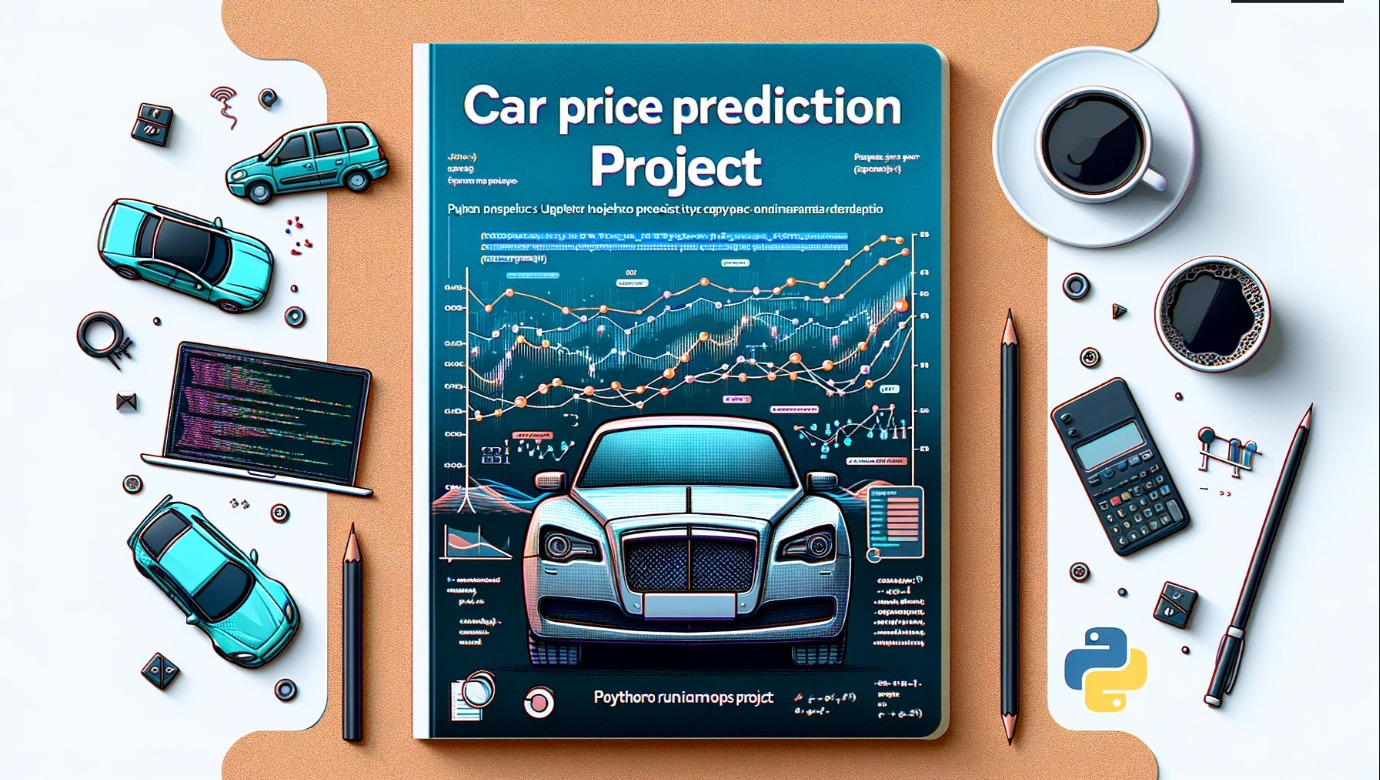

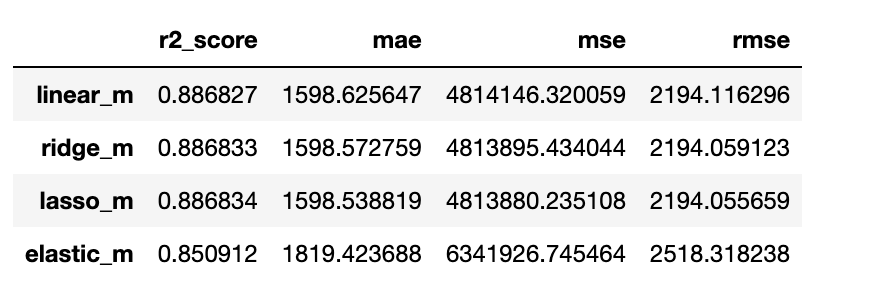

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Modelling_Auto_Scout_Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [184]:
df = pd.read_csv("/Users/enejanhayytjanova/Desktop/My Githup/Machine-Learning-Notes/assignments/final_scout_not_dummy.csv")

In [185]:
df.head()

make_model body_type  price               vat           km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000000  Used   Diesel   

     Gears                                Comfort_Convenience  \
0 7.000000  Air conditioning,Armrest,Automatic climate con...   
1 7.000000  Air conditioning,Automatic climate control,Hil...   
2 7.000000  Air conditioning,Cruise control,Electrical sid...   
3 6.000000  Air suspension,Armrest,Auxiliary heating,Elect...   
4 7.000000  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security      age  \
0  ABS,Central door lock,Daytime running lights,D... 3.000000   
1  ABS,Central door lock,Central door lock with r... 2.000000   
2  ABS,Central door lock,Daytime running lights,D... 3.000000   
3  ABS,Alarm system,Central door lock with remote... 3.000000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000000   

   Previous_Owners      hp_kW  Inspection_new Paint_Type Upholstery_type  \
0         2.000000  66.000000               1   Metallic           Cloth   
1         1.000000 141.000000               0   Metallic           Cloth   
2         1.000000  85.000000               0   Metallic           Cloth   
3         1.000000  66.000000               0   Metallic           Cloth   
4         1.000000  66.000000               1   Metallic           Cloth   

  Gearing_Type  Displacement_cc   Weight_kg Drive_chain  cons_comb  
0    Automatic      1422.000000 1220.000000       front   3.800000  
1    Automatic      1798.000000 1255.000000       front   5.600000  
2    Automatic      1598.000000 1135.000000       front   3.800000  
3    Automatic      1422.000000 1195.000000       front   3.800000  
4    Automatic      1422.000000 1135.000000       front   4.100000

In [186]:
car = df.copy()

In [187]:
car.shape

(15915, 23)

In [188]:
car = car[:-5]

In [189]:
car.shape

(15910, 23)

In [190]:
control = car.tail(5)

In [191]:
control

make_model body_type  price             vat          km  \
15905  Renault Espace       Van  39990  VAT deductible 3500.000000   
15906  Renault Espace       Van  39980  VAT deductible 8500.000000   
15907  Renault Espace       Van  39980  VAT deductible  100.000000   
15908  Renault Espace       Van  39950  VAT deductible 1647.362609   
15909  Renault Espace       Van  39950  VAT deductible 1000.000000   

                 Type     Fuel    Gears  \
15905   Demonstration   Diesel 7.000000   
15906   Demonstration  Benzine 7.000000   
15907  Pre-registered   Diesel 6.000000   
15908             New   Diesel 6.000000   
15909   Demonstration  Benzine 6.000000   

                                     Comfort_Convenience  \
15905  Air conditioning,Automatic climate control,Cru...   
15906  Air conditioning,Automatic climate control,Cru...   
15907  Air conditioning,Armrest,Automatic climate con...   
15908  Air conditioning,Automatic climate control,Cru...   
15909  Air conditioning,Armrest,Automatic climate con...   

                                     Entertainment_Media  \
15905  Bluetooth,Hands-free equipment,On-board comput...   
15906  Bluetooth,Hands-free equipment,On-board comput...   
15907  Bluetooth,Digital radio,Hands-free equipment,O...   
15908  Bluetooth,Digital radio,Hands-free equipment,O...   
15909  Bluetooth,Digital radio,Hands-free equipment,M...   

                                                  Extras  \
15905                          Alloy wheels,Touch screen   
15906                                       Alloy wheels   
15907            Alloy wheels,Touch screen,Voice Control   
15908                          Alloy wheels,Touch screen   
15909  Alloy wheels,Catalytic Converter,Sport suspens...   

                                         Safety_Security      age  \
15905  ABS,Blind spot monitor,Central door lock,Dayti... 0.000000   
15906  ABS,Adaptive headlights,Central door lock,Dayt... 0.000000   
15907  ABS,Adaptive Cruise Control,Central door lock,... 0.000000   
15908  ABS,Central door lock,Central door lock with r... 0.000000   
15909  ABS,Adaptive Cruise Control,Blind spot monitor... 0.000000   

       Previous_Owners      hp_kW  Inspection_new Paint_Type  \
15905         1.000000 147.000000               0   Metallic   
15906         1.000000 165.000000               0   Metallic   
15907         1.000000 118.000000               0   Metallic   
15908         1.000000 147.000000               0   Metallic   
15909         1.000000 165.000000               0   Metallic   

         Upholstery_type Gearing_Type  Displacement_cc   Weight_kg  \
15905  Part/Full Leather    Automatic      1997.000000 1779.000000   
15906  Part/Full Leather    Automatic      1798.000000 1734.000000   
15907  Part/Full Leather    Automatic      1598.000000 1734.000000   
15908  Part/Full Leather    Automatic      1997.000000 1758.000000   
15909  Part/Full Leather    Automatic      1798.000000 1734.000000   

      Drive_chain  cons_comb  
15905       front   4.700000  
15906       front   6.000000  
15907       front   4.700000  
15908       front   5.300000  
15909       front   6.800000

In [192]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15910 non-null  object 
 1   body_type            15910 non-null  object 
 2   price                15910 non-null  int64  
 3   vat                  15910 non-null  object 
 4   km                   15910 non-null  float64
 5   Type                 15910 non-null  object 
 6   Fuel                 15910 non-null  object 
 7   Gears                15910 non-null  float64
 8   Comfort_Convenience  15910 non-null  object 
 9   Entertainment_Media  15910 non-null  object 
 10  Extras               15910 non-null  object 
 11  Safety_Security      15910 non-null  object 
 12  age                  15910 non-null  float64
 13  Previous_Owners      15910 non-null  float64
 14  hp_kW                15910 non-null  float64
 15  Inspection_new       15910 non-null 

In [193]:
car.shape

(15910, 23)

In [194]:
car.describe().T

count         mean          std         min  \
price           15910.000000 18017.448649  7372.468263 4950.000000   
km              15910.000000 32099.249652 36979.281451    0.000000   
Gears           15910.000000     5.937272     0.704832    5.000000   
age             15910.000000     1.390132     1.121212    0.000000   
Previous_Owners 15910.000000     1.042866     0.339231    0.000000   
hp_kW           15910.000000    88.478755    26.652765   40.000000   
Inspection_new  15910.000000     0.247014     0.431289    0.000000   
Displacement_cc 15910.000000  1428.508297   275.706041  890.000000   
Weight_kg       15910.000000  1337.577687   199.592812  840.000000   
cons_comb       15910.000000     4.831750     0.867263    3.000000   

                         25%          50%          75%           max  
price           12850.000000 16900.000000 21900.000000  74600.000000  
km               1946.750000 20418.000000 46921.000000 317000.000000  
Gears               5.000000     6.000000     6.000000      8.000000  
age                 0.000000     1.000000     2.000000      3.000000  
Previous_Owners     1.000000     1.000000     1.000000      4.000000  
hp_kW              66.000000    85.000000   102.500000    294.000000  
Inspection_new      0.000000     0.000000     0.000000      1.000000  
Displacement_cc  1229.000000  1461.000000  1598.000000   2967.000000  
Weight_kg        1165.000000  1295.000000  1472.000000   2471.000000  
cons_comb           4.100000     4.800000     5.400000      9.100000

In [195]:
car.nunique().sort_values(ascending=True)

vat                       2
Upholstery_type           2
Inspection_new            2
Gearing_Type              3
Paint_Type                3
Drive_chain               3
Fuel                      4
Gears                     4
age                       4
Type                      5
Previous_Owners           5
body_type                 8
make_model                9
cons_comb                62
Displacement_cc          68
hp_kW                    77
Entertainment_Media     346
Weight_kg               432
Extras                  659
price                  2950
Safety_Security        4442
Comfort_Convenience    6195
km                     6691
dtype: int64

In [196]:
car.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [197]:
car_cat = car.select_dtypes(include="object")

In [198]:
car_cat.nunique().sort_values(ascending=True)

vat                       2
Upholstery_type           2
Paint_Type                3
Gearing_Type              3
Drive_chain               3
Fuel                      4
Type                      5
body_type                 8
make_model                9
Entertainment_Media     346
Extras                  659
Safety_Security        4442
Comfort_Convenience    6195
dtype: int64

In [199]:
car_numeric = car.select_dtypes(include="number")

In [200]:
car_numeric.head(2)

price           km    Gears      age  Previous_Owners      hp_kW  \
0  15770 56013.000000 7.000000 3.000000         2.000000  66.000000   
1  14500 80000.000000 7.000000 2.000000         1.000000 141.000000   

   Inspection_new  Displacement_cc   Weight_kg  cons_comb  
0               1      1422.000000 1220.000000   3.800000  
1               0      1798.000000 1255.000000   5.600000

In [201]:
car.head(2)

make_model body_type  price               vat           km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000000  Used  Benzine   

     Gears                                Comfort_Convenience  \
0 7.000000  Air conditioning,Armrest,Automatic climate con...   
1 7.000000  Air conditioning,Automatic climate control,Hil...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   

                                     Safety_Security      age  \
0  ABS,Central door lock,Daytime running lights,D... 3.000000   
1  ABS,Central door lock,Central door lock with r... 2.000000   

   Previous_Owners      hp_kW  Inspection_new Paint_Type Upholstery_type  \
0         2.000000  66.000000               1   Metallic           Cloth   
1         1.000000 141.000000               0   Metallic           Cloth   

  Gearing_Type  Displacement_cc   Weight_kg Drive_chain  cons_comb  
0    Automatic      1422.000000 1220.000000       front   3.800000  
1    Automatic      1798.000000 1255.000000       front   5.600000

In [202]:
def color_red(val):
   
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val>=1:
        color = "blue"
    else:
        color = 'black'
    return f'color: {color}'

In [203]:
car.corr()

price        km     Gears       age  Previous_Owners  \
price            1.000000 -0.399144  0.530727 -0.473093        -0.144713   
km              -0.399144  1.000000 -0.033101  0.758255         0.157026   
Gears            0.530727 -0.033101  1.000000 -0.064399        -0.036600   
age             -0.473093  0.758255 -0.064399  1.000000         0.316136   
Previous_Owners -0.144713  0.157026 -0.036600  0.316136         1.000000   
hp_kW            0.695749  0.004829  0.449936 -0.082397        -0.022480   
Inspection_new   0.007845 -0.049356 -0.011058 -0.045394         0.019564   
Displacement_cc  0.280703  0.307414  0.339537  0.216119         0.028043   
Weight_kg        0.467537  0.147694  0.333935  0.065701         0.003523   
cons_comb        0.271473 -0.300052 -0.004037 -0.341011        -0.020127   

                    hp_kW  Inspection_new  Displacement_cc  Weight_kg  \
price            0.695749        0.007845         0.280703   0.467537   
km               0.004829       -0.049356         0.307414   0.147694   
Gears            0.449936       -0.011058         0.339537   0.333935   
age             -0.082397       -0.045394         0.216119   0.065701   
Previous_Owners -0.022480        0.019564         0.028043   0.003523   
hp_kW            1.000000        0.036361         0.597038   0.637815   
Inspection_new   0.036361        1.000000        -0.026179  -0.035737   
Displacement_cc  0.597038       -0.026179         1.000000   0.562900   
Weight_kg        0.637815       -0.035737         0.562900   1.000000   
cons_comb        0.388303        0.147753         0.037200   0.088223   

                 cons_comb  
price             0.271473  
km               -0.300052  
Gears            -0.004037  
age              -0.341011  
Previous_Owners  -0.020127  
hp_kW             0.388303  
Inspection_new    0.147753  
Displacement_cc   0.037200  
Weight_kg         0.088223  
cons_comb         1.000000

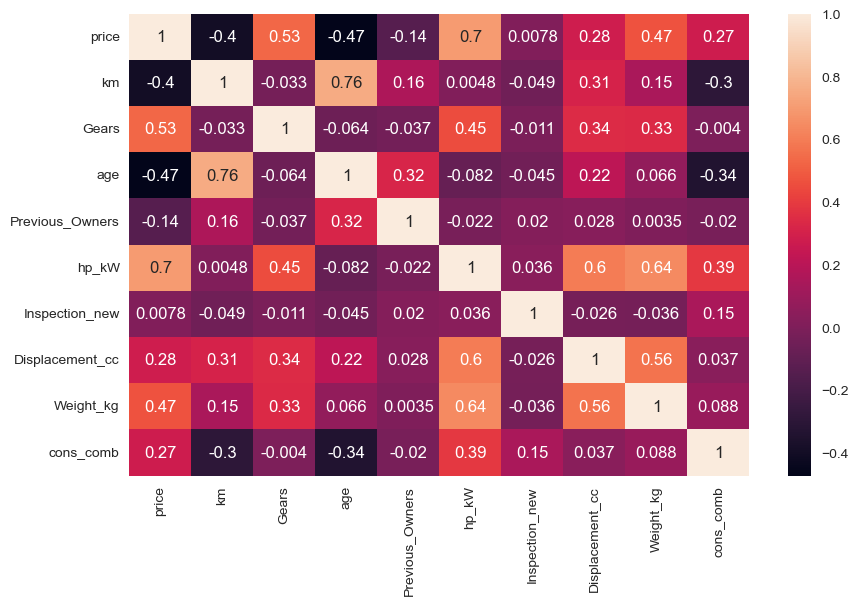

In [204]:
sns.heatmap(car.corr(), annot=True);

In [205]:
car.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [206]:
car.make_model.nunique()

9

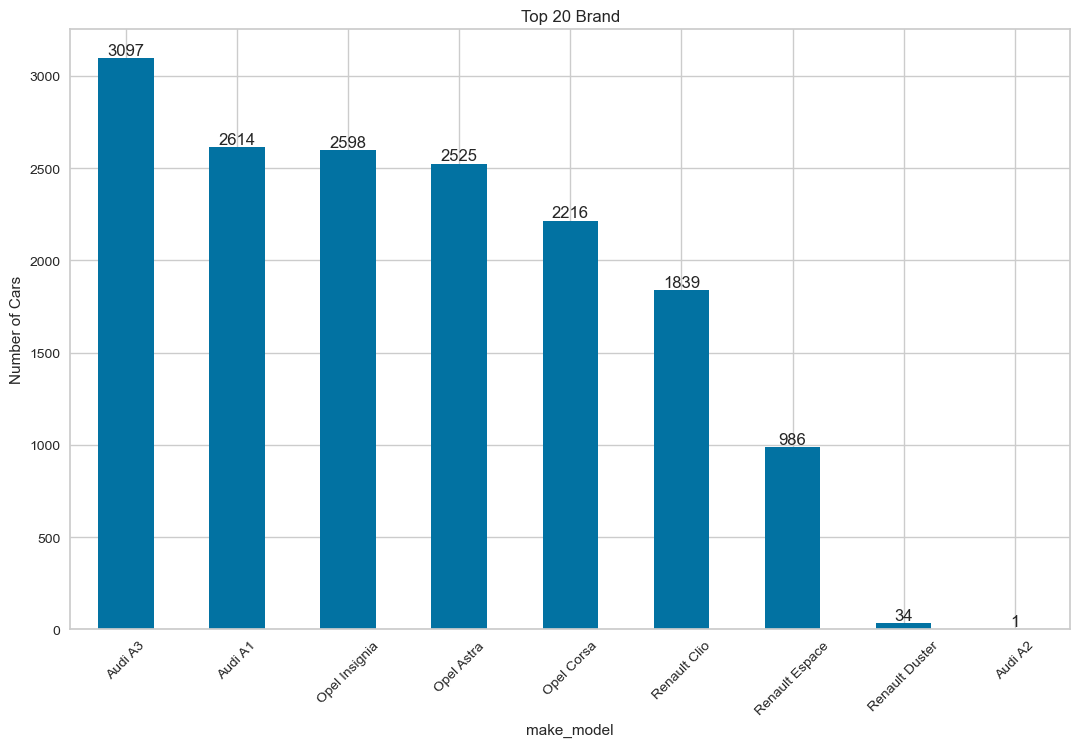

In [207]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = car.make_model.value_counts().sort_values(ascending=False).head(20) # [0:20]
counts.plot(kind = "bar")
plt.title('Top 20 Brand')   
plt.xlabel('make_model') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

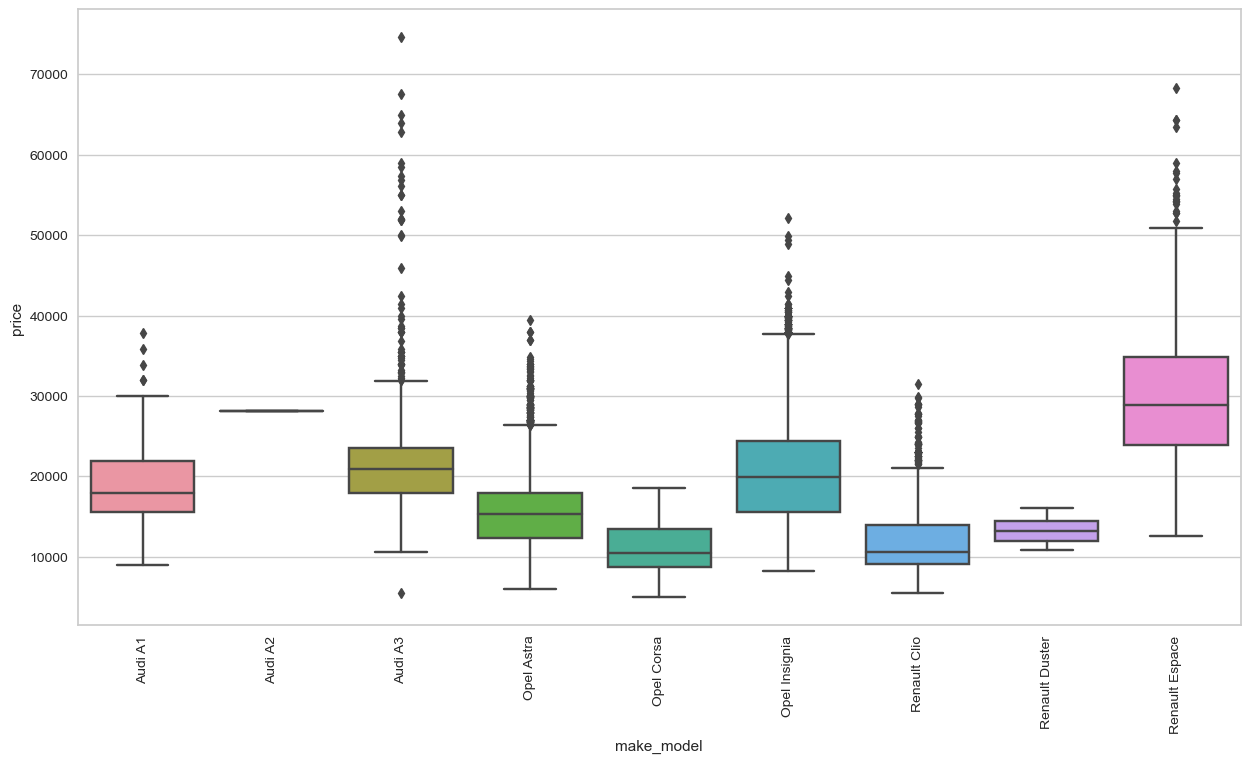

In [208]:
plt.figure(figsize = (15,8))
sns.boxplot(x="make_model", y="price", data=car)
plt.xticks(rotation = 90);


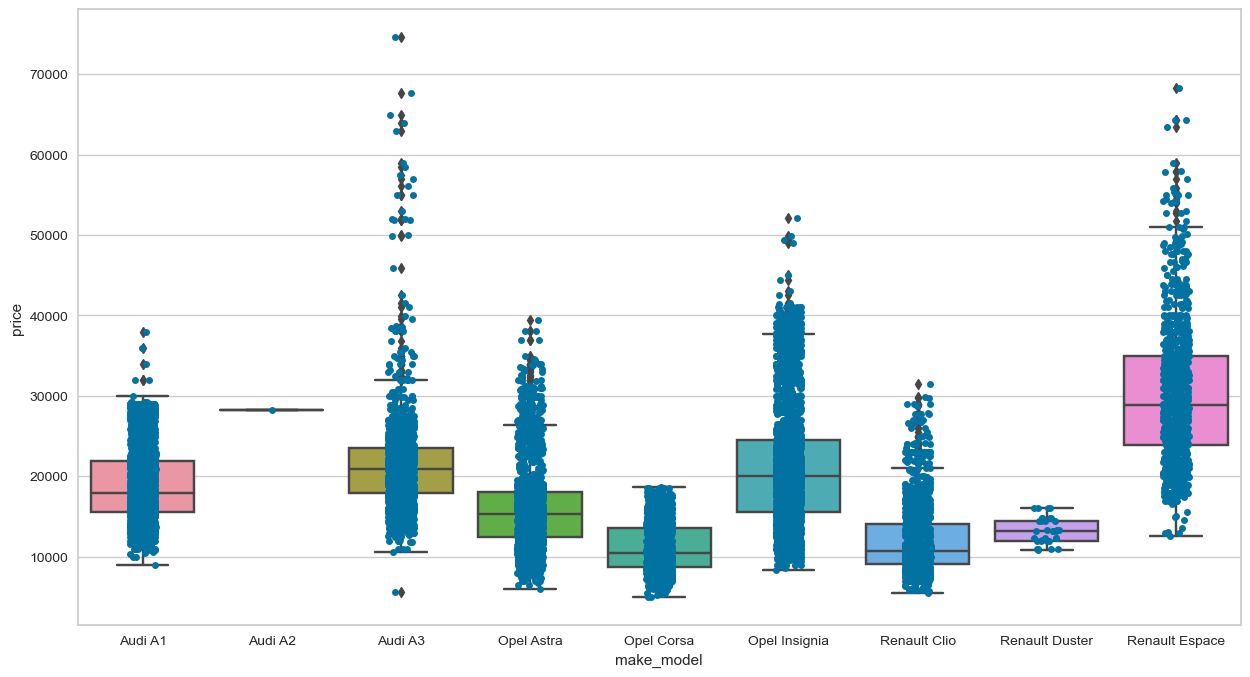

In [209]:
plt.figure(figsize = (15,8))
sns.boxplot(x="make_model", y="price", data=car)
sns.stripplot(x="make_model", y="price", data=car);

In [210]:
car.Type.nunique()

5

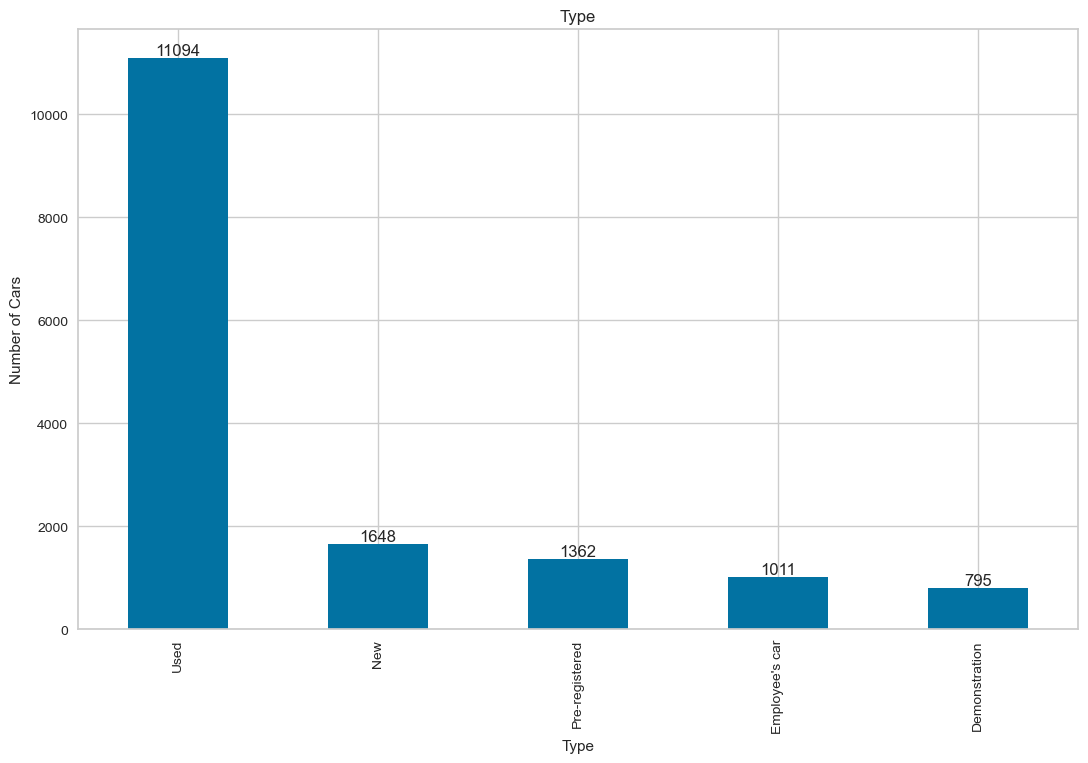

In [211]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = car.Type.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Type')   
plt.xlabel('Type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [212]:
car.Fuel.nunique()

4

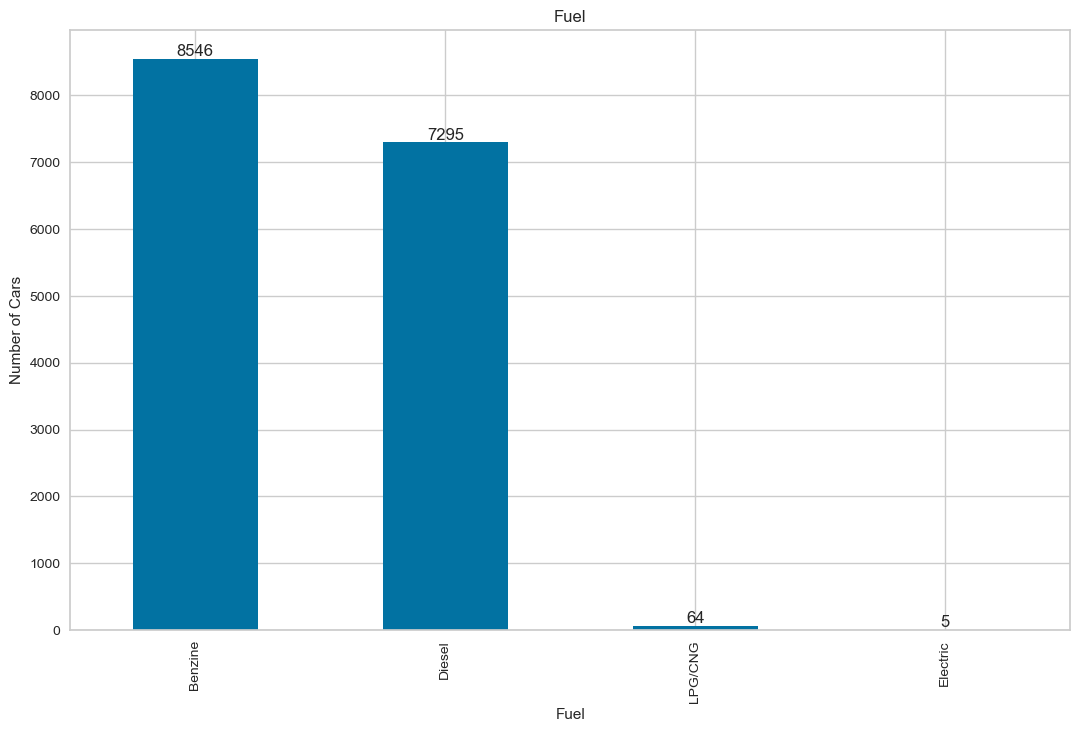

In [213]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = car.Fuel.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Fuel')   
plt.xlabel('Fuel') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [214]:
car.Gears.nunique()

4

In [215]:
car.km.nunique()

6691

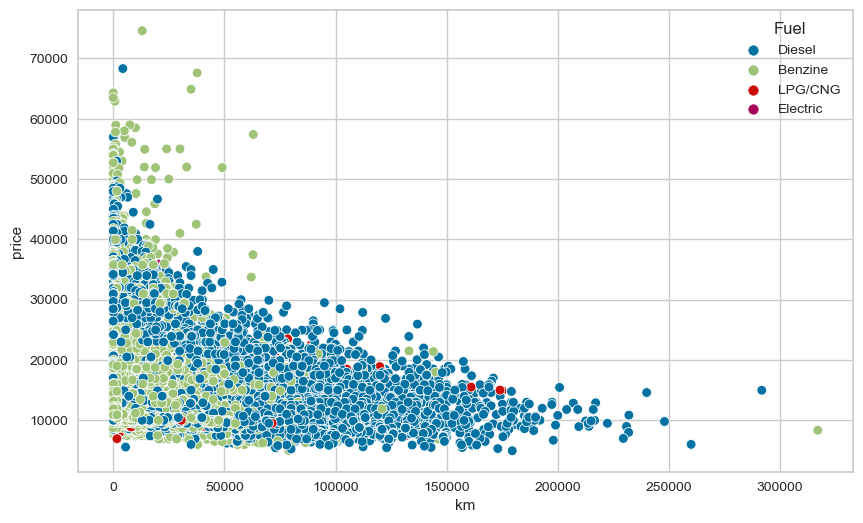

In [216]:
sns.scatterplot(data=car, y="price", x="km", hue="Fuel");

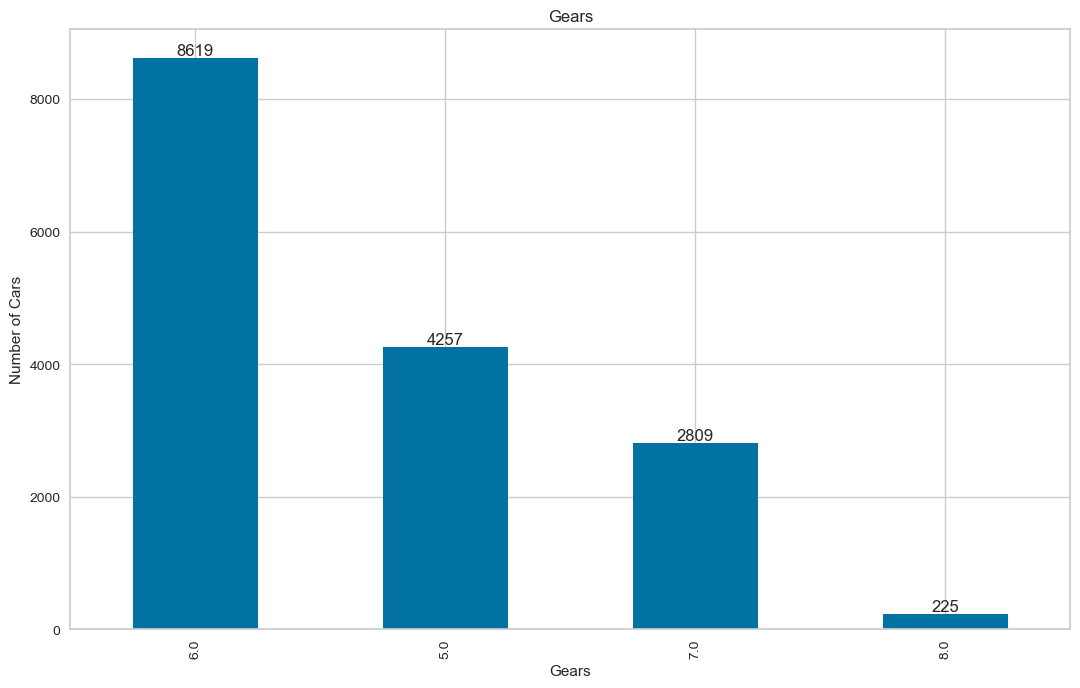

In [217]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = car.Gears.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Gears')   
plt.xlabel('Gears') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

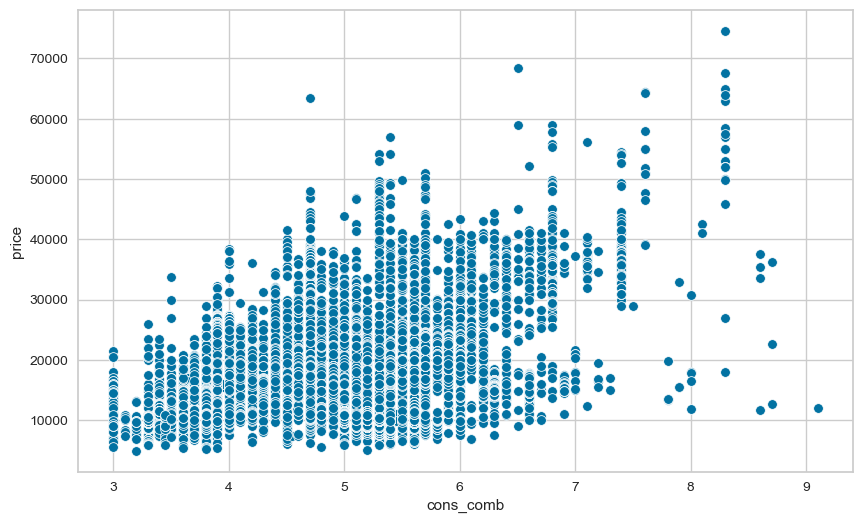

In [218]:
sns.scatterplot(car, x="cons_comb", y="price");

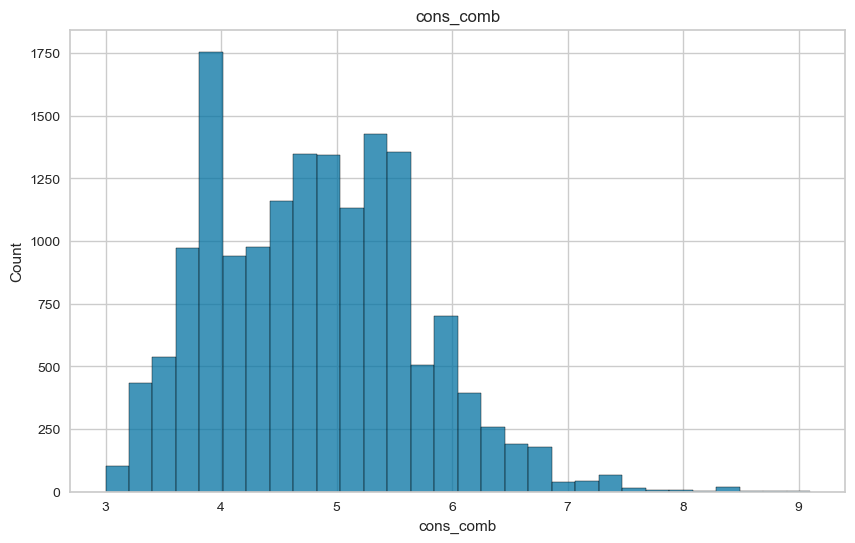

In [219]:
sns.histplot(data=car, x="cons_comb", bins=30)
plt.title('cons_comb');

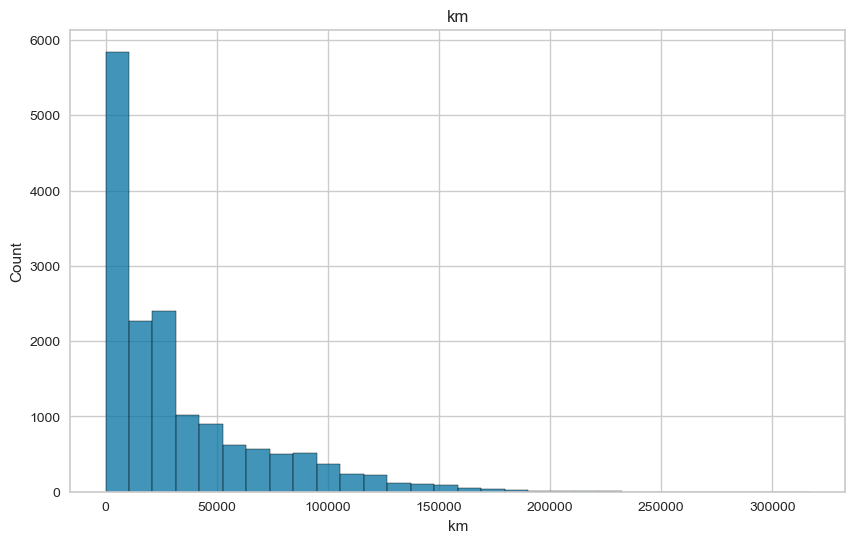

In [220]:
sns.histplot(data=car, x="km", bins=30)
plt.title('km');

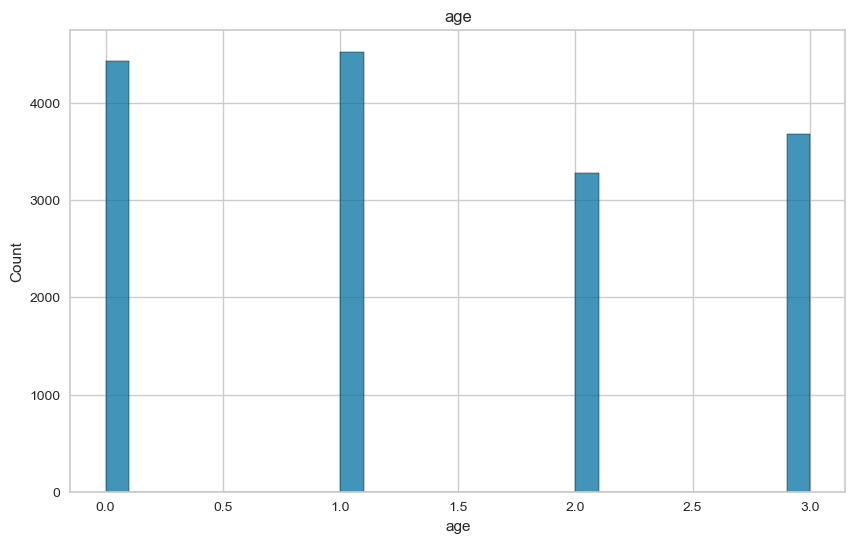

In [221]:
sns.histplot(data=car, x="age", bins=30)
plt.title('age');

In [222]:
car.age.nunique()

4

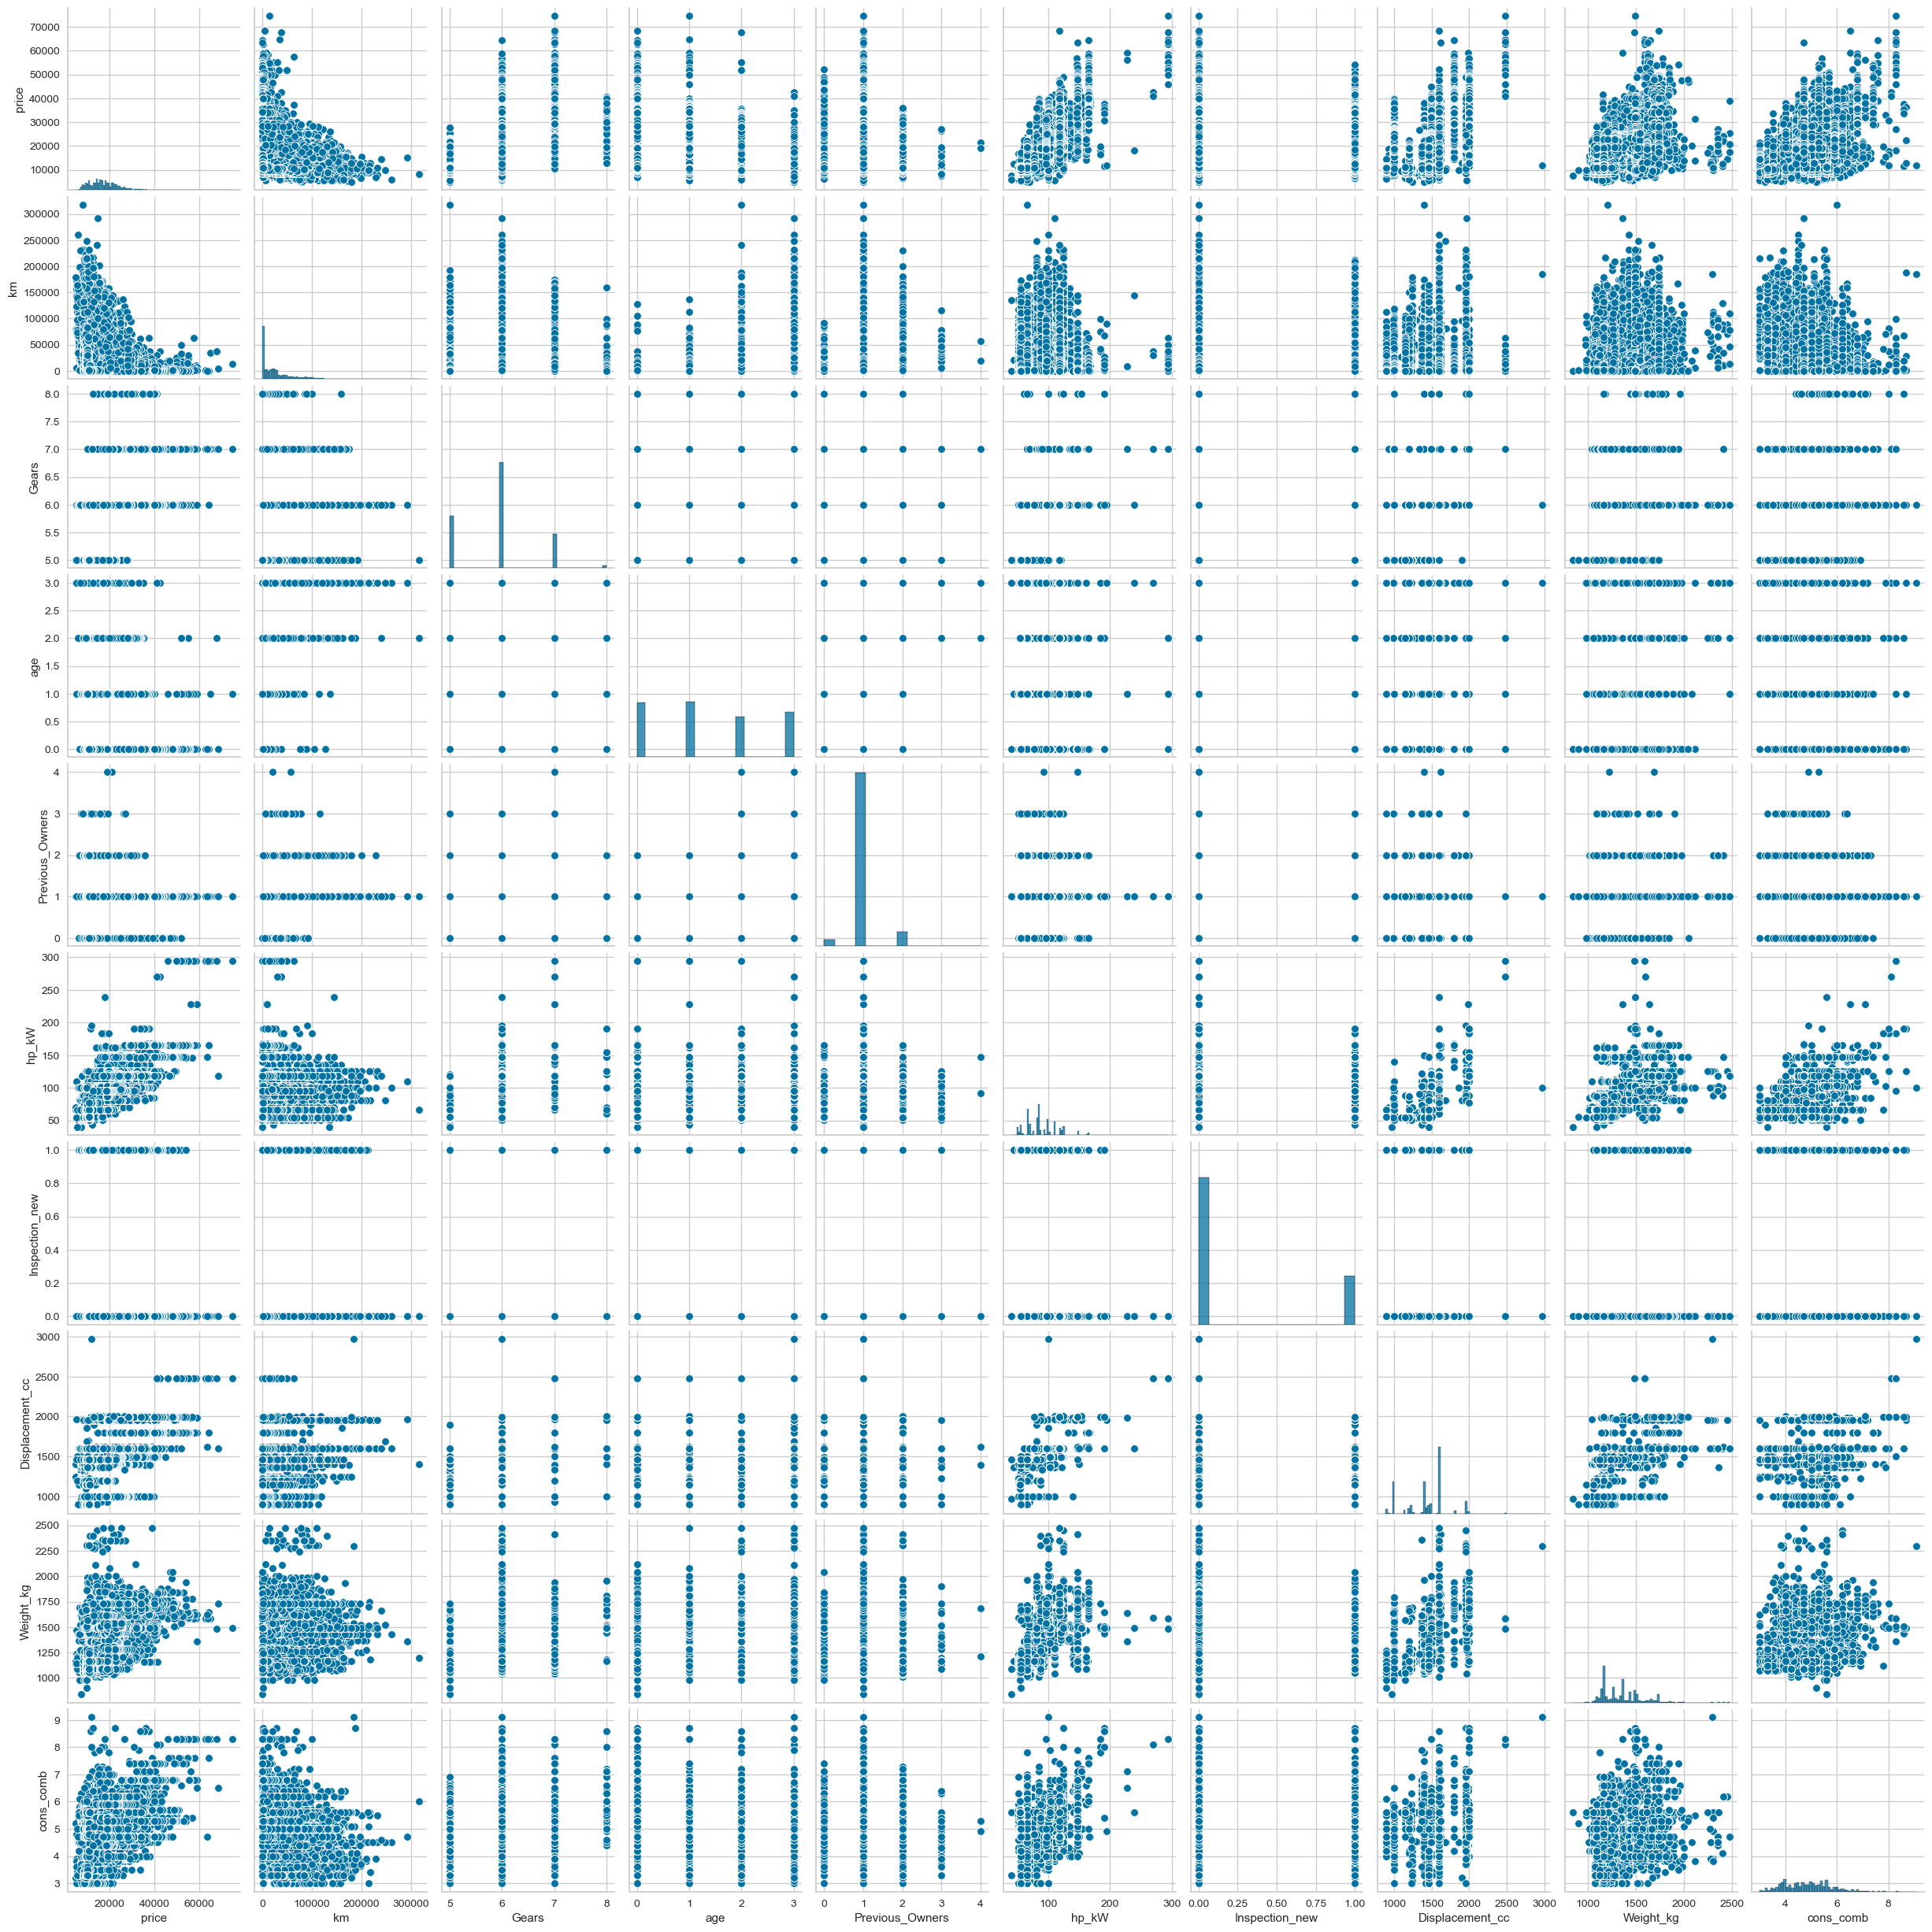

In [223]:
sns.pairplot(car_numeric);

In [224]:
car.head(2)

make_model body_type  price               vat           km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000000  Used  Benzine   

     Gears                                Comfort_Convenience  \
0 7.000000  Air conditioning,Armrest,Automatic climate con...   
1 7.000000  Air conditioning,Automatic climate control,Hil...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   

                                     Safety_Security      age  \
0  ABS,Central door lock,Daytime running lights,D... 3.000000   
1  ABS,Central door lock,Central door lock with r... 2.000000   

   Previous_Owners      hp_kW  Inspection_new Paint_Type Upholstery_type  \
0         2.000000  66.000000               1   Metallic           Cloth   
1         1.000000 141.000000               0   Metallic           Cloth   

  Gearing_Type  Displacement_cc   Weight_kg Drive_chain  cons_comb  
0    Automatic      1422.000000 1220.000000       front   3.800000  
1    Automatic      1798.000000 1255.000000       front   5.600000

In [225]:
for i in car.select_dtypes("object"):
    print(f"{i:<30}:", car[i].unique())

make_model                    : ['Audi A1' 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Off-Road' 'Convertible'
 'Transporter']
vat                           : ['VAT deductible' 'Price negotiable']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG' 'Electric']
Comfort_Convenience           : ['Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system'
 'Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,S

In [226]:
car["Extras"] = car.Extras.apply(lambda x: len(x.split(',')))

car["Entertainment_Media"] = car.Entertainment_Media.apply(lambda x: len(x.split(',')))

car["Safety_Security"] = car.Safety_Security.apply(lambda x: len(x.split(',')))

car["Comfort_Convenience"] = car.Comfort_Convenience.apply(lambda x: len(x.split(',')))

# bulduğumuz bu sayıları ilgili featura atıyoruz.

In [227]:
car.head()

make_model body_type  price               vat           km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000000  Used   Diesel   

     Gears  Comfort_Convenience  Entertainment_Media  Extras  Safety_Security  \
0 7.000000                   16                    4       3               14   
1 7.000000                    9                    5       4               15   
2 7.000000                   13                    2       2               12   
3 6.000000                   16                    8       3               14   
4 7.000000                   13                    7       4               13   

       age  Previous_Owners      hp_kW  Inspection_new Paint_Type  \
0 3.000000         2.000000  66.000000               1   Metallic   
1 2.000000         1.000000 141.000000               0   Metallic   
2 3.000000         1.000000  85.000000               0   Metallic   
3 3.000000         1.000000  66.000000               0   Metallic   
4 3.000000         1.000000  66.000000               1   Metallic   

  Upholstery_type Gearing_Type  Displacement_cc   Weight_kg Drive_chain  \
0           Cloth    Automatic      1422.000000 1220.000000       front   
1           Cloth    Automatic      1798.000000 1255.000000       front   
2           Cloth    Automatic      1598.000000 1135.000000       front   
3           Cloth    Automatic      1422.000000 1195.000000       front   
4           Cloth    Automatic      1422.000000 1135.000000       front   

   cons_comb  
0   3.800000  
1   5.600000  
2   3.800000  
3   3.800000  
4   4.100000

In [228]:
car_cat_2 = car.select_dtypes(include="object")
car_cat_2

make_model body_type               vat            Type     Fuel  \
0             Audi A1    Sedans    VAT deductible            Used   Diesel   
1             Audi A1    Sedans  Price negotiable            Used  Benzine   
2             Audi A1    Sedans    VAT deductible            Used   Diesel   
3             Audi A1    Sedans    VAT deductible            Used   Diesel   
4             Audi A1    Sedans    VAT deductible            Used   Diesel   
...               ...       ...               ...             ...      ...   
15905  Renault Espace       Van    VAT deductible   Demonstration   Diesel   
15906  Renault Espace       Van    VAT deductible   Demonstration  Benzine   
15907  Renault Espace       Van    VAT deductible  Pre-registered   Diesel   
15908  Renault Espace       Van    VAT deductible             New   Diesel   
15909  Renault Espace       Van    VAT deductible   Demonstration  Benzine   

      Paint_Type    Upholstery_type Gearing_Type Drive_chain  
0       Metallic              Cloth    Automatic       front  
1       Metallic              Cloth    Automatic       front  
2       Metallic              Cloth    Automatic       front  
3       Metallic              Cloth    Automatic       front  
4       Metallic              Cloth    Automatic       front  
...          ...                ...          ...         ...  
15905   Metallic  Part/Full Leather    Automatic       front  
15906   Metallic  Part/Full Leather    Automatic       front  
15907   Metallic  Part/Full Leather    Automatic       front  
15908   Metallic  Part/Full Leather    Automatic       front  
15909   Metallic  Part/Full Leather    Automatic       front  

[15910 rows x 9 columns]

## Multicollinearity control

In [229]:
car_numeric.corr()[(car_numeric.corr()>= 0.9) & (car_numeric.corr() < 1)].any().any()

False

In [230]:
car_numeric.corr()[(car_numeric.corr()<= -0.9) & (car_numeric.corr() > -1)].any().any()

False

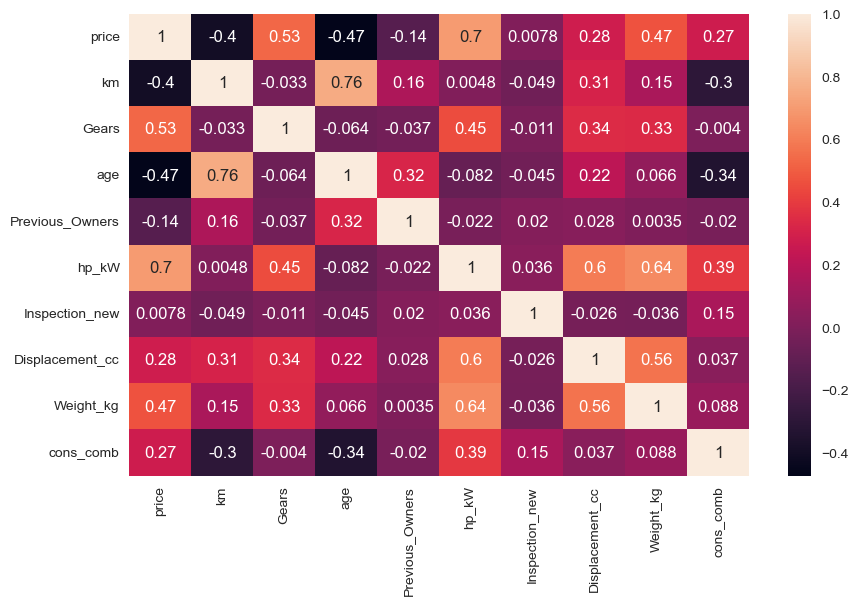

In [231]:
sns.heatmap(car_numeric.corr(), annot=True);

## Outlier in price column

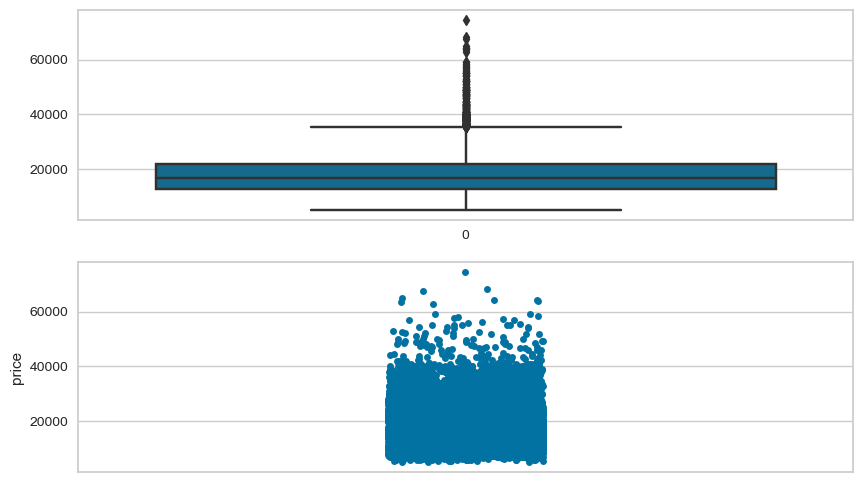

In [232]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(car.price)

plt.subplot(212)
sns.stripplot(car.price);

In [233]:
total_outliers = []

for model in car.make_model.unique():
    
    car_prices = car[car["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(car[car['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(car)).round(3))

# 1.5 wisker değerine göre her bir gruba ait outlier olabileceğini değerlendirdiğimiz verileri tespit ediyoruz.

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A2         : 0    ,           The rate of outliers : 0.0
 The count of outlier for Audi A3         : 54   ,           The rate of outliers : 0.017
 The count of outlier for Opel Astra      : 134  ,           The rate of outliers : 0.053
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 114  ,           The rate of outliers : 0.044
 The count of outlier for Renault Clio    : 90   ,           The rate of outliers : 0.049
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 22   ,           The rate of outliers : 0.022

Total_outliers :  419 The rate of total outliers : 0.026


In [234]:
car.shape

(15910, 23)

In [235]:
for model in car.make_model.unique():
    
    car_prices = car[car["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = car[car["make_model"]== model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    car.drop(index = drop_index, inplace=True)
    car.reset_index(drop=True, inplace=True)
car.head(2)

# Burada  outlier gözlemleri datamızdan çıkarıyoruz. Önce lower ve upper sınrılarını belirleyip bu limitlerin dışında
# kalan araba fiyatlarının indexlerini tespit edip bu indexleri datamızdan drop ediyoruz
# drop ettiğimiz indexleri ignore edip index sıralamasını düzgün yapabilmek için reset_indexi kullanıyoruz.

make_model body_type  price               vat           km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000000  Used  Benzine   

     Gears  Comfort_Convenience  Entertainment_Media  Extras  Safety_Security  \
0 7.000000                   16                    4       3               14   
1 7.000000                    9                    5       4               15   

       age  Previous_Owners      hp_kW  Inspection_new Paint_Type  \
0 3.000000         2.000000  66.000000               1   Metallic   
1 2.000000         1.000000 141.000000               0   Metallic   

  Upholstery_type Gearing_Type  Displacement_cc   Weight_kg Drive_chain  \
0           Cloth    Automatic      1422.000000 1220.000000       front   
1           Cloth    Automatic      1798.000000 1255.000000       front   

   cons_comb  
0   3.800000  
1   5.600000

In [236]:
car.shape

(15491, 23)

## Outlier for km column

In [237]:
car.km.unique()

array([5.6013e+04, 8.0000e+04, 8.3450e+04, ..., 2.8640e+03, 1.5060e+03,
       5.7000e+01])

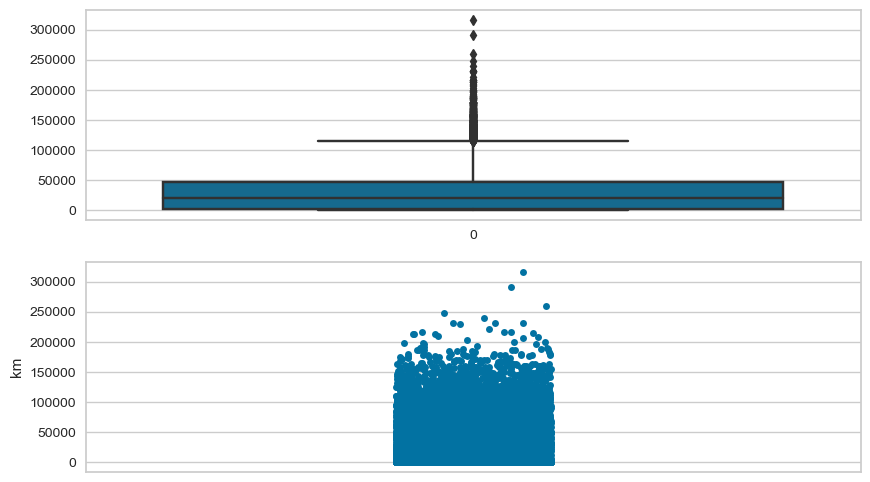

In [238]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(car.km)

plt.subplot(212)
sns.stripplot(car.km);

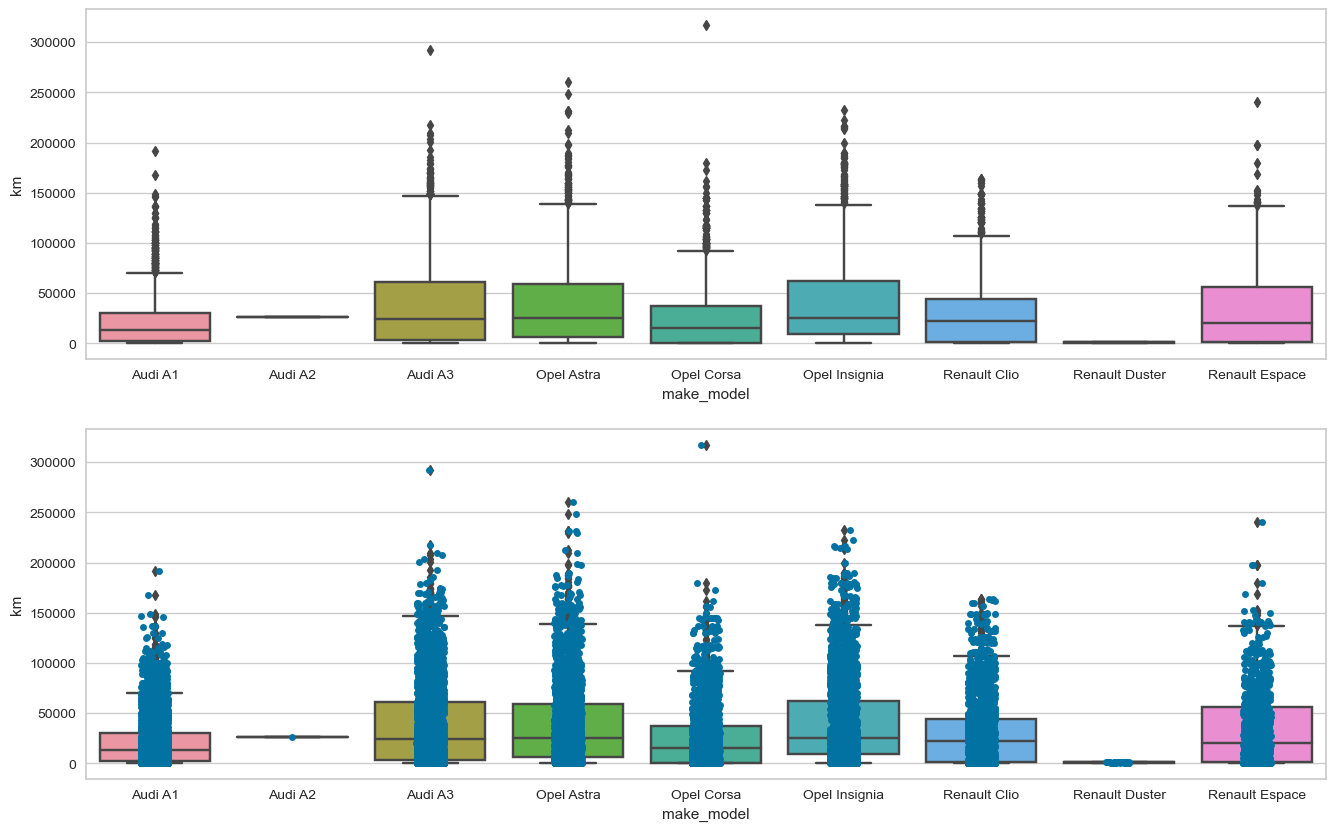

In [239]:
plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(x="make_model", y="km", data=car, whis=1.5)

plt.subplot(212)
sns.boxplot(x="make_model", y="km", data=car, whis=1.5)
sns.stripplot(x="make_model", y="km", data=car);

In [240]:
total_outliers = []

for model in car.make_model.unique():
    
    car_km = car[car["make_model"]== model]["km"]
    
    Q1 = car_km.quantile(0.25)
    Q3 = car_km.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_km[(car_km < lower_lim) | (car_km > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(car[car['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(car)).round(3))

# 1.5 wisker değerine göre her bir gruba ait outlier olabileceğini değerlendirdiğimiz verileri tespit ediyoruz.

 The count of outlier for Audi A1         : 141  ,           The rate of outliers : 0.054
 The count of outlier for Audi A2         : 0    ,           The rate of outliers : 0.0
 The count of outlier for Audi A3         : 62   ,           The rate of outliers : 0.02
 The count of outlier for Opel Astra      : 73   ,           The rate of outliers : 0.031
 The count of outlier for Opel Corsa      : 97   ,           The rate of outliers : 0.044
 The count of outlier for Opel Insignia   : 84   ,           The rate of outliers : 0.034
 The count of outlier for Renault Clio    : 66   ,           The rate of outliers : 0.038
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 19   ,           The rate of outliers : 0.02

Total_outliers :  542 The rate of total outliers : 0.035


## OneHotEncoder

In [241]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Selecting only the categorical columns
categorical_cols = ['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Drive_chain']
car_categorical = car[categorical_cols]

# Initializing the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the data
encoded_data = encoder.fit_transform(car_categorical)

# Getting feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Creating a DataFrame with the encoded data and feature names
car_encoded = pd.DataFrame(encoded_data, columns=encoded_feature_names)

# Concatenating the encoded DataFrame with the original DataFrame
car_encoded = pd.concat([car, car_encoded], axis=1)

# Dropping the original categorical columns
car_encoded.drop(columns=categorical_cols, inplace=True)

# Now, car_encoded contains your original data with one-hot encoded categorical features


In [242]:
car_encoded

price           km    Gears  Comfort_Convenience  Entertainment_Media  \
0      15770 56013.000000 7.000000                   16                    4   
1      14500 80000.000000 7.000000                    9                    5   
2      14640 83450.000000 7.000000                   13                    2   
3      14500 73000.000000 6.000000                   16                    8   
4      16790 16200.000000 7.000000                   13                    7   
...      ...          ...      ...                  ...                  ...   
15486  39990  3500.000000 7.000000                   17                    5   
15487  39980  8500.000000 7.000000                   19                    4   
15488  39980   100.000000 6.000000                   27                    7   
15489  39950  1647.362609 6.000000                   20                    6   
15490  39950  1000.000000 6.000000                   26                    7   

       Extras  Safety_Security      age  Previous_Owners      hp_kW  \
0           3               14 3.000000         2.000000  66.000000   
1           4               15 2.000000         1.000000 141.000000   
2           2               12 3.000000         1.000000  85.000000   
3           3               14 3.000000         1.000000  66.000000   
4           4               13 3.000000         1.000000  66.000000   
...       ...              ...      ...              ...        ...   
15486       2               18 0.000000         1.000000 147.000000   
15487       1                8 0.000000         1.000000 165.000000   
15488       3               18 0.000000         1.000000 118.000000   
15489       2               19 0.000000         1.000000 147.000000   
15490       5               19 0.000000         1.000000 165.000000   

       Inspection_new  Displacement_cc   Weight_kg  cons_comb  \
0                   1      1422.000000 1220.000000   3.800000   
1                   0      1798.000000 1255.000000   5.600000   
2                   0      1598.000000 1135.000000   3.800000   
3                   0      1422.000000 1195.000000   3.800000   
4                   1      1422.000000 1135.000000   4.100000   
...               ...              ...         ...        ...   
15486               0      1997.000000 1779.000000   4.700000   
15487               0      1798.000000 1734.000000   6.000000   
15488               0      1598.000000 1734.000000   4.700000   
15489               0      1997.000000 1758.000000   5.300000   
15490               0      1798.000000 1734.000000   6.800000   

       make_model_Audi A2  make_model_Audi A3  make_model_Opel Astra  \
0                0.000000            0.000000               0.000000   
1                0.000000            0.000000               0.000000   
2                0.000000            0.000000               0.000000   
3                0.000000            0.000000               0.000000   
4                0.000000            0.000000               0.000000   
...                   ...                 ...                    ...   
15486            0.000000            0.000000               0.000000   
15487            0.000000            0.000000               0.000000   
15488            0.000000            0.000000               0.000000   
15489            0.000000            0.000000               0.000000   
15490            0.000000            0.000000               0.000000   

       make_model_Opel Corsa  make_model_Opel Insignia  \
0                   0.000000                  0.000000   
1                   0.000000                  0.000000   
2                   0.000000                  0.000000   
3                   0.000000                  0.000000   
4                   0.000000                  0.000000   
...                      ...                       ...   
15486               0.000000                  0.000000   
15487               0.000000                  0.000000   
15488               0.000

In [243]:
feature_to_move = 'price'
new_index = len(car_encoded.columns)  # Index for the last position


columns = car_encoded.columns.tolist()  # Get column names as a list
current_index = columns.index("price")  # Find the current index of the feature
columns.insert(new_index, columns.pop(0))  # Move the feature to the last position

# Reassign the columns with the new order to the DataFrame
car_encoded = car_encoded[columns]

In [244]:
car_encoded

km    Gears  Comfort_Convenience  Entertainment_Media  Extras  \
0     56013.000000 7.000000                   16                    4       3   
1     80000.000000 7.000000                    9                    5       4   
2     83450.000000 7.000000                   13                    2       2   
3     73000.000000 6.000000                   16                    8       3   
4     16200.000000 7.000000                   13                    7       4   
...            ...      ...                  ...                  ...     ...   
15486  3500.000000 7.000000                   17                    5       2   
15487  8500.000000 7.000000                   19                    4       1   
15488   100.000000 6.000000                   27                    7       3   
15489  1647.362609 6.000000                   20                    6       2   
15490  1000.000000 6.000000                   26                    7       5   

       Safety_Security      age  Previous_Owners      hp_kW  Inspection_new  \
0                   14 3.000000         2.000000  66.000000               1   
1                   15 2.000000         1.000000 141.000000               0   
2                   12 3.000000         1.000000  85.000000               0   
3                   14 3.000000         1.000000  66.000000               0   
4                   13 3.000000         1.000000  66.000000               1   
...                ...      ...              ...        ...             ...   
15486               18 0.000000         1.000000 147.000000               0   
15487                8 0.000000         1.000000 165.000000               0   
15488               18 0.000000         1.000000 118.000000               0   
15489               19 0.000000         1.000000 147.000000               0   
15490               19 0.000000         1.000000 165.000000               0   

       Displacement_cc   Weight_kg  cons_comb  make_model_Audi A2  \
0          1422.000000 1220.000000   3.800000            0.000000   
1          1798.000000 1255.000000   5.600000            0.000000   
2          1598.000000 1135.000000   3.800000            0.000000   
3          1422.000000 1195.000000   3.800000            0.000000   
4          1422.000000 1135.000000   4.100000            0.000000   
...                ...         ...        ...                 ...   
15486      1997.000000 1779.000000   4.700000            0.000000   
15487      1798.000000 1734.000000   6.000000            0.000000   
15488      1598.000000 1734.000000   4.700000            0.000000   
15489      1997.000000 1758.000000   5.300000            0.000000   
15490      1798.000000 1734.000000   6.800000            0.000000   

       make_model_Audi A3  make_model_Opel Astra  make_model_Opel Corsa  \
0                0.000000               0.000000               0.000000   
1                0.000000               0.000000               0.000000   
2                0.000000               0.000000               0.000000   
3                0.000000               0.000000               0.000000   
4                0.000000               0.000000               0.000000   
...                   ...                    ...                    ...   
15486            0.000000               0.000000               0.000000   
15487            0.000000               0.000000               0.000000   
15488            0.000000               0.000000               0.000000   
15489            0.000000               0.000000               0.000000   
15490            0.000000               0.000000               0.000000   

       make_model_Opel Insignia  make_model_Renault Clio  \
0                      0.000000                 0.000000   
1                      0.000000                 0.000000   
2                      0.000000                 0.000000   
3                      0.000000                 0.000000   
4                      0.000000                 0.000000   
... 

In [245]:
car_encoded.shape

(15491, 44)

In [246]:
car_encoded.columns

Index(['km', 'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Displacement_cc', 'Weight_kg', 'cons_comb', 'make_model_Audi A2',
       'make_model_Audi A3', 'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Duster', 'make_model_Renault Espace',
       'body_type_Convertible', 'body_type_Coupe', 'body_type_Off-Road',
       'body_type_Sedans', 'body_type_Station wagon', 'body_type_Transporter',
       'body_type_Van', 'vat_VAT deductible', 'Type_Employee's car',
       'Type_New', 'Type_Pre-registered', 'Type_Used', 'Fuel_Diesel',
       'Fuel_Electric', 'Fuel_LPG/CNG', 'Paint_Type_Perl effect',
       'Paint_Type_Uni/basic', 'Upholstery_type_Part/Full Leather',
       'Gearing_Type_Manual', 'Gearing_Type_Semi-automatic',
       'Drive_chain_front', 'Drive_chain_rear', 'price'],
      dtype='object

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [247]:
X = car_encoded.drop('price', axis=1)
y = car_encoded["price"]

## Train | Test Split Data

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [250]:
X_train.shape

(14716, 43)

## Scaling Data


In [251]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [252]:
scaler = StandardScaler()

In [253]:
scaler.fit(X_train)

StandardScaler()

In [254]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.4616473 , -1.31264623, -0.50844117, ..., -0.16258874,
         0.10615992, -0.01648899],
       [-0.18219133,  0.10625357,  0.49725613, ..., -0.16258874,
         0.10615992, -0.01648899],
       [-0.88465704,  0.10625357, -1.17890603, ..., -0.16258874,
         0.10615992, -0.01648899],
       ...,
       [-0.88387846,  0.10625357, -0.00559252, ..., -0.16258874,
         0.10615992, -0.01648899],
       [-0.37748029,  1.52515338, -0.50844117, ..., -0.16258874,
         0.10615992, -0.01648899],
       [-0.15719627,  0.10625357,  1.33533721, ..., -0.16258874,
         0.10615992, -0.01648899]])

In [255]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.75044622,  1.52515338, -1.17890603, ..., -0.16258874,
         0.10615992, -0.01648899],
       [-0.73031057,  0.10625357, -0.8436736 , ..., -0.16258874,
         0.10615992, -0.01648899],
       [-0.6941201 ,  0.10625357,  0.16202369, ..., -0.16258874,
         0.10615992, -0.01648899],
       ...,
       [-0.06578042,  1.52515338, -1.34652225, ..., -0.16258874,
         0.10615992, -0.01648899],
       [-0.84045627,  0.10625357,  0.66487234, ..., -0.16258874,
         0.10615992, -0.01648899],
       [ 0.05986603, -1.31264623, -1.01128982, ..., -0.16258874,
         0.10615992, -0.01648899]])

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [256]:
from sklearn.linear_model import LinearRegression

In [257]:
lm = LinearRegression()

In [258]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [259]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [260]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [261]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear") 
ls 

linear_train    linear_test
R2         0.888679       0.886827
mae     1618.863702    1598.625647
mse  5094909.634837 4814146.320059
rmse    2257.190651    2194.116296

In [262]:
y_pred = lm.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_mse = mean_squared_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [263]:
lm_R2

0.8868273013163973

## Cross Validation (CV)

In [264]:
from sklearn.model_selection import cross_validate, cross_val_score

In [265]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 10)

In [266]:
cv_df = pd.DataFrame(scores)
cv_df

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
0  0.010559    0.000711 -2.959517                  -1945.894118   
1  0.024242    0.000985  0.894236                  -1567.122764   
2  0.021315    0.001655  0.883780                  -1639.777528   
3  0.014944    0.000905  0.888385                  -1640.249354   
4  0.017247    0.000526  0.894278                  -1565.926982   
5  0.029267    0.000543  0.894622                  -1562.007001   
6  0.018090    0.000491  0.884242                  -1640.144003   
7  0.011488    0.002318  0.872815                  -1719.196997   
8  0.009088    0.000941  0.883209                  -1711.742961   
9  0.016922    0.000725  0.885271                  -1615.527291   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
0            -193380501.532163                     -13906.131796  
1              -4700412.857596                      -2168.043555  
2              -5333416.853972                      -2309.419159  
3              -5233916.654960                      -2287.775482  
4              -4580156.876411                      -2140.130107  
5              -4529477.707546                      -2128.256965  
6              -5128938.268218                      -2264.715935  
7              -5829176.638037                      -2414.368787  
8              -5902929.888708                      -2429.594593  
9              -5076723.158522                      -2253.158485

In [267]:
cv_df.iloc[:, 2:].mean()

test_r2                                    0.502132
test_neg_mean_absolute_error           -1660.758900
test_neg_mean_squared_error        -23969565.043613
test_neg_root_mean_squared_error       -3430.159487
dtype: float64

In [268]:
2585/car.price.mean()

0.14711082918912122

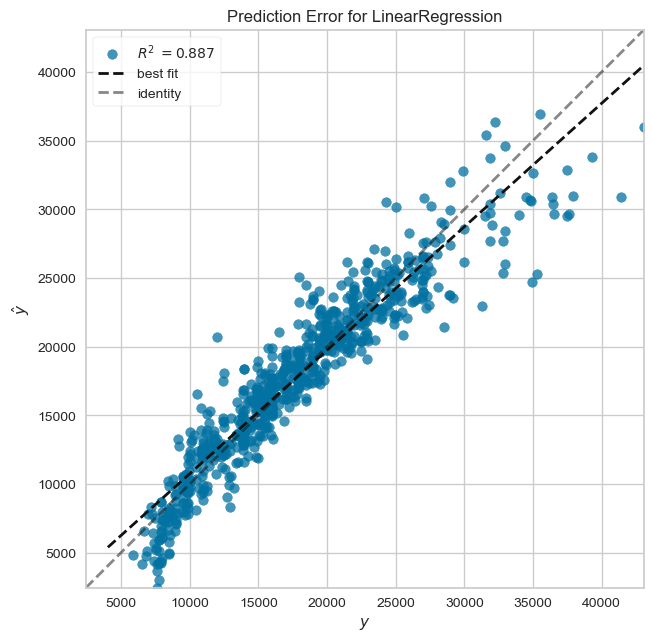

In [269]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

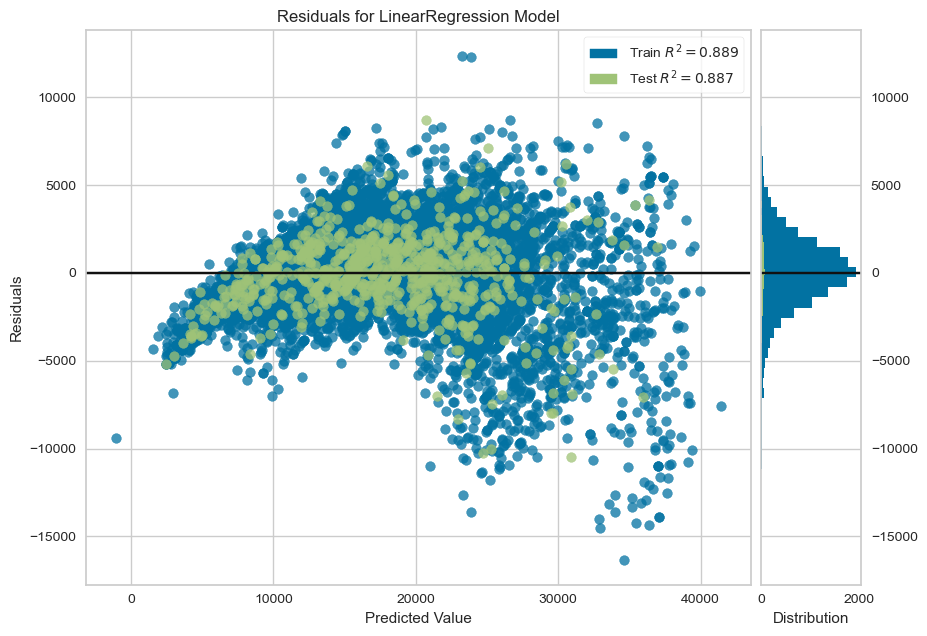

In [270]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

In [271]:
lm_mae

1598.625646807492

## 4. Implement Ridge Regularization

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [272]:
scaler = StandardScaler()

In [273]:
X_train_scaled = scaler.fit_transform(X_train)

In [274]:
X_test_scaled =scaler.transform(X_test)

In [275]:
from sklearn.linear_model import Ridge

In [276]:
ridge_model = Ridge(alpha=1.0, random_state=42)

In [277]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [278]:
y_pred = ridge_model.predict(X_test_scaled)
y_pred_train = ridge_model.predict(X_train_scaled)

In [279]:
rs = train_val(y_train, y_train_pred, y_test, y_pred,"ridge")
rs

ridge_train     ridge_test
R2         0.888679       0.886833
mae     1618.863702    1598.572759
mse  5094909.634837 4813895.434044
rmse    2257.190651    2194.059123

In [280]:
pd.concat([ls, rs], axis=1)

linear_train    linear_test    ridge_train     ridge_test
R2         0.888679       0.886827       0.888679       0.886833
mae     1618.863702    1598.625647    1618.863702    1598.572759
mse  5094909.634837 4814146.320059 5094909.634837 4813895.434044
rmse    2257.190651    2194.116296    2257.190651    2194.059123

In [281]:
y_pred = ridge_model.predict(X_test_scaled)

rs_R2 = r2_score(y_test, y_pred)
rs_mae = mean_absolute_error(y_test, y_pred)
rs_mse = mean_squared_error(y_test, y_pred)
rs_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Choosing Best Alpha with CV

In [282]:
from sklearn.linear_model import RidgeCV

In [283]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [284]:
ridge_cv_model = RidgeCV(alphas= alpha_space, cv=10, scoring="neg_root_mean_squared_error")

In [285]:
ridge_cv_model

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [286]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [287]:
ridge_cv_model.alpha_

1.0

In [288]:
ridge_cv_model.best_score_

-2266.6007525292734

In [289]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [290]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

ridge_cv_train  ridge_cv_test
R2          0.888679       0.886833
mae      1618.833113    1598.572759
mse   5094909.966078 4813895.434044
rmse     2257.190724    2194.059123

In [291]:
pd.concat([ls, rs, rcs], axis = 1)

linear_train    linear_test    ridge_train     ridge_test  \
R2         0.888679       0.886827       0.888679       0.886833   
mae     1618.863702    1598.625647    1618.863702    1598.572759   
mse  5094909.634837 4814146.320059 5094909.634837 4813895.434044   
rmse    2257.190651    2194.116296    2257.190651    2194.059123   

      ridge_cv_train  ridge_cv_test  
R2          0.888679       0.886833  
mae      1618.833113    1598.572759  
mse   5094909.966078 4813895.434044  
rmse     2257.190724    2194.059123

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## random state=42

In [292]:
scaler = StandardScaler()

In [293]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [294]:
from sklearn.linear_model import Lasso, LassoCV

In [295]:
lasso_model = Lasso(alpha=1.0, random_state = 42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [296]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [297]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

lasso_train     lasso_test
R2         0.888675       0.886834
mae     1618.588123    1598.538819
mse  5095048.369540 4813880.235108
rmse    2257.221382    2194.055659

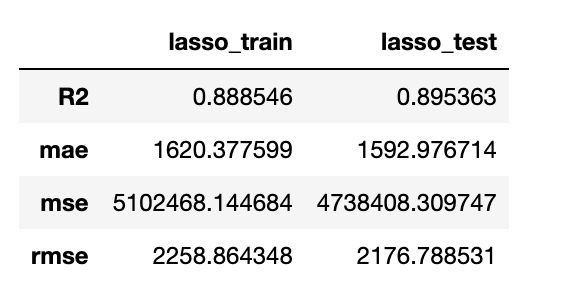

In [298]:
pd.concat([ls, rs, rcs, lss], axis = 1)

linear_train    linear_test    ridge_train     ridge_test  \
R2         0.888679       0.886827       0.888679       0.886833   
mae     1618.863702    1598.625647    1618.863702    1598.572759   
mse  5094909.634837 4814146.320059 5094909.634837 4813895.434044   
rmse    2257.190651    2194.116296    2257.190651    2194.059123   

      ridge_cv_train  ridge_cv_test    lasso_train     lasso_test  
R2          0.888679       0.886833       0.888675       0.886834  
mae      1618.833113    1598.572759    1618.588123    1598.538819  
mse   5094909.966078 4813895.434044 5095048.369540 4813880.235108  
rmse     2257.190724    2194.059123    2257.221382    2194.055659

In [299]:
y_pred = lasso_model.predict(X_test_scaled)

lss_R2 = r2_score(y_test, y_pred)
lss_mae = mean_absolute_error(y_test, y_pred)
lss_mse = mean_squared_error(y_test, y_pred)
lss_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [300]:
model = Lasso(alpha=1.0, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 10)

In [301]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                                   0.887539
test_neg_mean_absolute_error          -1625.204306
test_neg_mean_squared_error        -5146603.825134
test_neg_root_mean_squared_error      -2266.492525
dtype: float64

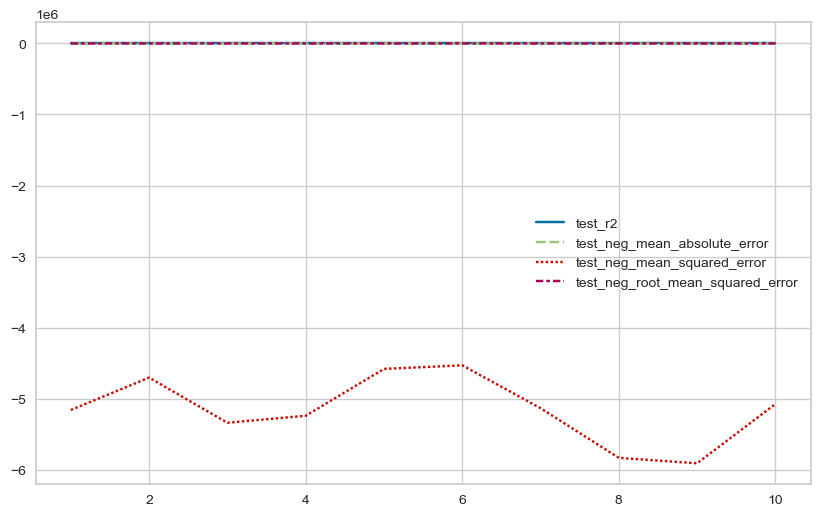

In [302]:
sns.lineplot(data = scores.iloc[:, 2:]);

In [303]:
lasso_model.coef_

array([-1273.5288496 ,   496.30276511,   556.6507269 ,  -235.08920379,
           8.09181194,    -1.96087735, -1884.01942868,    38.26318405,
        1857.75025071,   -61.23105131,  -161.64019668,  -144.64529525,
          35.07257395,    70.81488426,   469.53535127, -1462.40273654,
       -1925.85293539,  -356.44251932, -1719.92958506,  -462.95838569,
        1123.28177931,   -11.40622273,    -5.36359624,    37.56201555,
         104.54886827,   127.48964064,   -74.94760763,   367.13217297,
          41.59833769,  -766.87096683,  -415.57557253,  -658.32608872,
       -1310.77269004,   365.28805014,    -0.        ,    57.36784258,
          89.72315541,    28.96721977,   219.18276933,  -766.02248577,
         263.59896245,  -209.99083057,   -56.89866764])

In [304]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv=5, max_iter=10000, random_state=42)

In [305]:
lasso_cv_model.fit(X_train_scaled, y_train )

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=10000, random_state=42)

In [306]:
lasso_cv_model.alpha_

1.0

In [307]:
best_alpha = lasso_cv_model.alpha_

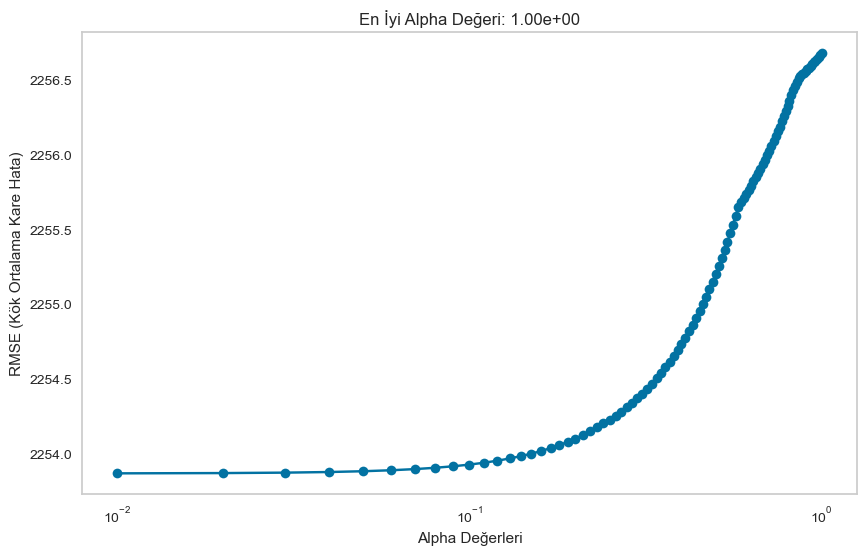

In [308]:
rmse_values = []
for alpha in alpha_space:
    lasso_model = Lasso(alpha=alpha, max_iter=100000, random_state=42)
    lasso_model.fit(X, y)
    y_pred = lasso_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_values.append(rmse)
# Alpha değerlerini ve RMSE değerlerini görselleştirin
plt.figure(figsize=(10, 6))
plt.plot(alpha_space, rmse_values, marker='o')
plt.xscale('log')  # X eksenini logaritmik ölçekte ayarlayın
plt.xlabel('Alpha Değerleri')
plt.ylabel('RMSE (Kök Ortalama Kare Hata)')
plt.title(f'En İyi Alpha Değeri: {best_alpha:.2e}')
plt.grid()
plt.show()

In [309]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [310]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

lasso_cv_train  lasso_cv_test
R2          0.888675       0.886834
mae      1618.588123    1598.538819
mse   5095048.369540 4813880.235108
rmse     2257.221382    2194.055659

In [311]:
pd.concat([ls, rs, rcs, lss, lcs], axis = 1)

linear_train    linear_test    ridge_train     ridge_test  \
R2         0.888679       0.886827       0.888679       0.886833   
mae     1618.863702    1598.625647    1618.863702    1598.572759   
mse  5094909.634837 4814146.320059 5094909.634837 4813895.434044   
rmse    2257.190651    2194.116296    2257.190651    2194.059123   

      ridge_cv_train  ridge_cv_test    lasso_train     lasso_test  \
R2          0.888679       0.886833       0.888675       0.886834   
mae      1618.833113    1598.572759    1618.588123    1598.538819   
mse   5094909.966078 4813895.434044 5095048.369540 4813880.235108   
rmse     2257.190724    2194.059123    2257.221382    2194.055659   

      lasso_cv_train  lasso_cv_test  
R2          0.888675       0.886834  
mae      1618.588123    1598.538819  
mse   5095048.369540 4813880.235108  
rmse     2257.221382    2194.055659

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## random state = 42

In [312]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [313]:
elastic_model = ElasticNet(alpha =1.0, l1_ratio=0.5 , random_state= 42)

In [314]:
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(random_state=42)

In [315]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [316]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

elastic_train   elastic_test
R2         0.845279       0.850912
mae     1889.737533    1819.423688
mse  7081178.494531 6341926.745464
rmse    2661.048383    2518.318238

In [317]:
pd.concat([ls, rs, rcs, lss, lcs, es], axis=1)

linear_train    linear_test    ridge_train     ridge_test  \
R2         0.888679       0.886827       0.888679       0.886833   
mae     1618.863702    1598.625647    1618.863702    1598.572759   
mse  5094909.634837 4814146.320059 5094909.634837 4813895.434044   
rmse    2257.190651    2194.116296    2257.190651    2194.059123   

      ridge_cv_train  ridge_cv_test    lasso_train     lasso_test  \
R2          0.888679       0.886833       0.888675       0.886834   
mae      1618.833113    1598.572759    1618.588123    1598.538819   
mse   5094909.966078 4813895.434044 5095048.369540 4813880.235108   
rmse     2257.190724    2194.059123    2257.221382    2194.055659   

      lasso_cv_train  lasso_cv_test  elastic_train   elastic_test  
R2          0.888675       0.886834       0.845279       0.850912  
mae      1618.588123    1598.538819    1889.737533    1819.423688  
mse   5095048.369540 4813880.235108 7081178.494531 6341926.745464  
rmse     2257.221382    2194.055659    2661.048383    2518.318238

In [318]:
y_pred = elastic_model.predict(X_test_scaled)

es_R2 = r2_score(y_test, y_pred)
es_mae = mean_absolute_error(y_test, y_pred)
es_mse = mean_squared_error(y_test, y_pred)
es_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [319]:
model = ElasticNet(alpha=1, l1_ratio=0.5 ,random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 10)

In [320]:
scores = pd.DataFrame(scores, index = range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                   0.844521
test_neg_mean_absolute_error          -1893.568960
test_neg_mean_squared_error        -7121300.964842
test_neg_root_mean_squared_error      -2665.700561
dtype: float64

In [321]:
elastic_cv_model = ElasticNetCV(alphas= alpha_space, l1_ratio=0.5, 
                                cv=10, max_iter = 100000, random_state=42)

In [322]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, max_iter=100000, random_state=42)

In [323]:
elastic_cv_model.alpha_

0.01

In [324]:
elastic_cv_model.l1_ratio_

0.5

In [325]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [326]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

elastic_cv_train  elastic_cv_test
R2            0.888642         0.887208
mae        1616.901048      1595.042605
mse     5096590.074069   4797959.501231
rmse       2257.562862      2190.424503

In [327]:
 pd.concat([ls, rs, rcs, lss, lcs, es, ecs], axis=1)

linear_train    linear_test    ridge_train     ridge_test  \
R2         0.888679       0.886827       0.888679       0.886833   
mae     1618.863702    1598.625647    1618.863702    1598.572759   
mse  5094909.634837 4814146.320059 5094909.634837 4813895.434044   
rmse    2257.190651    2194.116296    2257.190651    2194.059123   

      ridge_cv_train  ridge_cv_test    lasso_train     lasso_test  \
R2          0.888679       0.886833       0.888675       0.886834   
mae      1618.833113    1598.572759    1618.588123    1598.538819   
mse   5094909.966078 4813895.434044 5095048.369540 4813880.235108   
rmse     2257.190724    2194.059123    2257.221382    2194.055659   

      lasso_cv_train  lasso_cv_test  elastic_train   elastic_test  \
R2          0.888675       0.886834       0.845279       0.850912   
mae      1618.588123    1598.538819    1889.737533    1819.423688   
mse   5095048.369540 4813880.235108 7081178.494531 6341926.745464   
rmse     2257.221382    2194.055659    2661.048383    2518.318238   

      elastic_cv_train  elastic_cv_test  
R2            0.888642         0.887208  
mae        1616.901048      1595.042605  
mse     5096590.074069   4797959.501231  
rmse       2257.562862      2190.424503

## Grid Search

In [328]:
from sklearn.model_selection import GridSearchCV

In [329]:
elastic_model = ElasticNet(max_iter= 10000, random_state=42)

In [330]:
param_grid = {"alpha": [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1], 
              "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.99, 1]}

In [331]:
grid_model = GridSearchCV(estimator = elastic_model, 
                        param_grid = param_grid, 
                        scoring = "neg_root_mean_squared_error",
                        cv=10, verbose = 2)

In [332]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.1s
[CV] END ...........................alpha=0.01

[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.1s
[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.1s
[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.1s
[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.1s
[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.1s
[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.1s
[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.1s
[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.1s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.1s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.1s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.1s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.1s
[CV] END ...................

[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

[CV] END ................................alpha=1, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [333]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [334]:
grid_model.best_index_

41

In [335]:
grid_model.best_score_

-2266.4925253814217

In [336]:
grid_model.cv_results_

{'mean_fit_time': array([0.13985362, 0.09122362, 0.11343458, 0.09751735, 0.09690154,
        0.09641395, 0.08984547, 0.0858005 , 0.08532782, 0.0924346 ,
        0.0893975 , 0.0878443 , 0.03936417, 0.03606637, 0.03901012,
        0.05259399, 0.08999679, 0.06139791, 0.02544141, 0.03408599,
        0.03558931, 0.04235513, 0.0591651 , 0.05831618, 0.02444861,
        0.0280436 , 0.02955022, 0.03659539, 0.04641871, 0.05291526,
        0.02210958, 0.0301681 , 0.03350332, 0.04372461, 0.04822001,
        0.05097272, 0.01916635, 0.02183323, 0.02421093, 0.0418442 ,
        0.04272926, 0.05538051]),
 'std_fit_time': array([0.0876131 , 0.00826479, 0.01457478, 0.01091182, 0.00924036,
        0.01409106, 0.00370997, 0.00252559, 0.00538429, 0.00725631,
        0.00501527, 0.00492664, 0.00311708, 0.0037767 , 0.00188674,
        0.01190059, 0.06969479, 0.00536089, 0.00159004, 0.01269876,
        0.00457455, 0.00930058, 0.00421527, 0.00704979, 0.0042617 ,
        0.00408875, 0.00492876, 0.00413479, 0.002

In [337]:
pd.DataFrame(pd.DataFrame(grid_model.cv_results_))

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.139854      0.087613         0.000615        0.000466    0.010000   
1        0.091224      0.008265         0.000378        0.000260    0.010000   
2        0.113435      0.014575         0.000924        0.000743    0.010000   
3        0.097517      0.010912         0.000833        0.000976    0.010000   
4        0.096902      0.009240         0.000640        0.001051    0.010000   
5        0.096414      0.014091         0.000821        0.001404    0.010000   
6        0.089845      0.003710         0.000731        0.000491    0.012000   
7        0.085801      0.002526         0.000245        0.000116    0.012000   
8        0.085328      0.005384         0.000409        0.000421    0.012000   
9        0.092435      0.007256         0.000450        0.000211    0.012000   
10       0.089398      0.005015         0.000333        0.000175    0.012000   
11       0.087844      0.004927         0.000520        0.000331    0.012000   
12       0.039364      0.003117         0.000778        0.000777    0.200000   
13       0.036066      0.003777         0.000429        0.000193    0.200000   
14       0.039010      0.001887         0.000491        0.000450    0.200000   
15       0.052594      0.011901         0.000259        0.000188    0.200000   
16       0.089997      0.069695         0.000367        0.000238    0.200000   
17       0.061398      0.005361         0.000380        0.000154    0.200000   
18       0.025441      0.001590         0.000415        0.000398    0.500000   
19       0.034086      0.012699         0.000540        0.000730    0.500000   
20       0.035589      0.004575         0.000558        0.000582    0.500000   
21       0.042355      0.009301         0.000302        0.000151    0.500000   
22       0.059165      0.004215         0.000560        0.000468    0.500000   
23       0.058316      0.007050         0.000424        0.000216    0.500000   
24       0.024449      0.004262         0.000631        0.000833    0.600000   
25       0.028044      0.004089         0.000427        0.000196    0.600000   
26       0.029550      0.004929         0.000285        0.000264    0.600000   
27       0.036595      0.004135         0.000606        0.000535    0.600000   
28       0.046419      0.002152         0.000264        0.000160    0.600000   
29       0.052915      0.003372         0.000446        0.000476    0.600000   
30       0.022110      0.005251         0.000459        0.000197    0.700000   
31       0.030168      0.005822         0.000342        0.000242    0.700000   
32       0.033503      0.003758         0.000336        0.000441    0.700000   
33       0.043725      0.006871         0.000469        0.000286    0.700000   
34       0.048220      0.002874         0.000434        0.000646    0.700000   
35       0.050973      0.005018         0.000250        0.000188    0.700000   
36       0.019166      0.001658         0.000511        0.000320           1   
37       0.021833      0.002738         0.000485        0.000476           1   
38       0.024211      0.002958         0.000242        0.000205           1   
39       0.041844      0.022644         0.000486        0.000199           1   
40       0.042729      0.003976         0.000924        0.001694           1   
41       0.055381      0.017684         0.000261        0.000148           1   

   param_l1_ratio                              params  split0_test_score  \
0        0.100000    {'alpha': 0.01, 'l1_ratio': 0.1}       -2272.815025   
1        0.500000    {'alpha': 0.01, 'l1_ratio': 0.5}       -2271.492892   
2        0.700000    {'alpha': 0.01, 'l1_ratio': 0.7}       -2271.016710   
3        0.900000    {'alpha': 0.01, 'l1_ratio': 0.9}       -2270.679088   
4        0.990000   {'alpha': 0.01, 'l1_ratio': 0.99}       -2270.575820   
5               1      {'alpha': 0.01, 'l1_ratio': 1}       -2270.566297   
6        0.100000   {'alpha': 0

In [338]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [339]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

GridSearch_train  GridSearch_test
R2            0.888675         0.886834
mae        1618.588123      1598.538819
mse     5095048.369540   4813880.235108
rmse       2257.221382      2194.055659

## Feature Importance 

In [340]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz #figsize gibi işlem 
## yapıyor görseli büyütmek için import ediyoruz altta 720, 3000 dedik

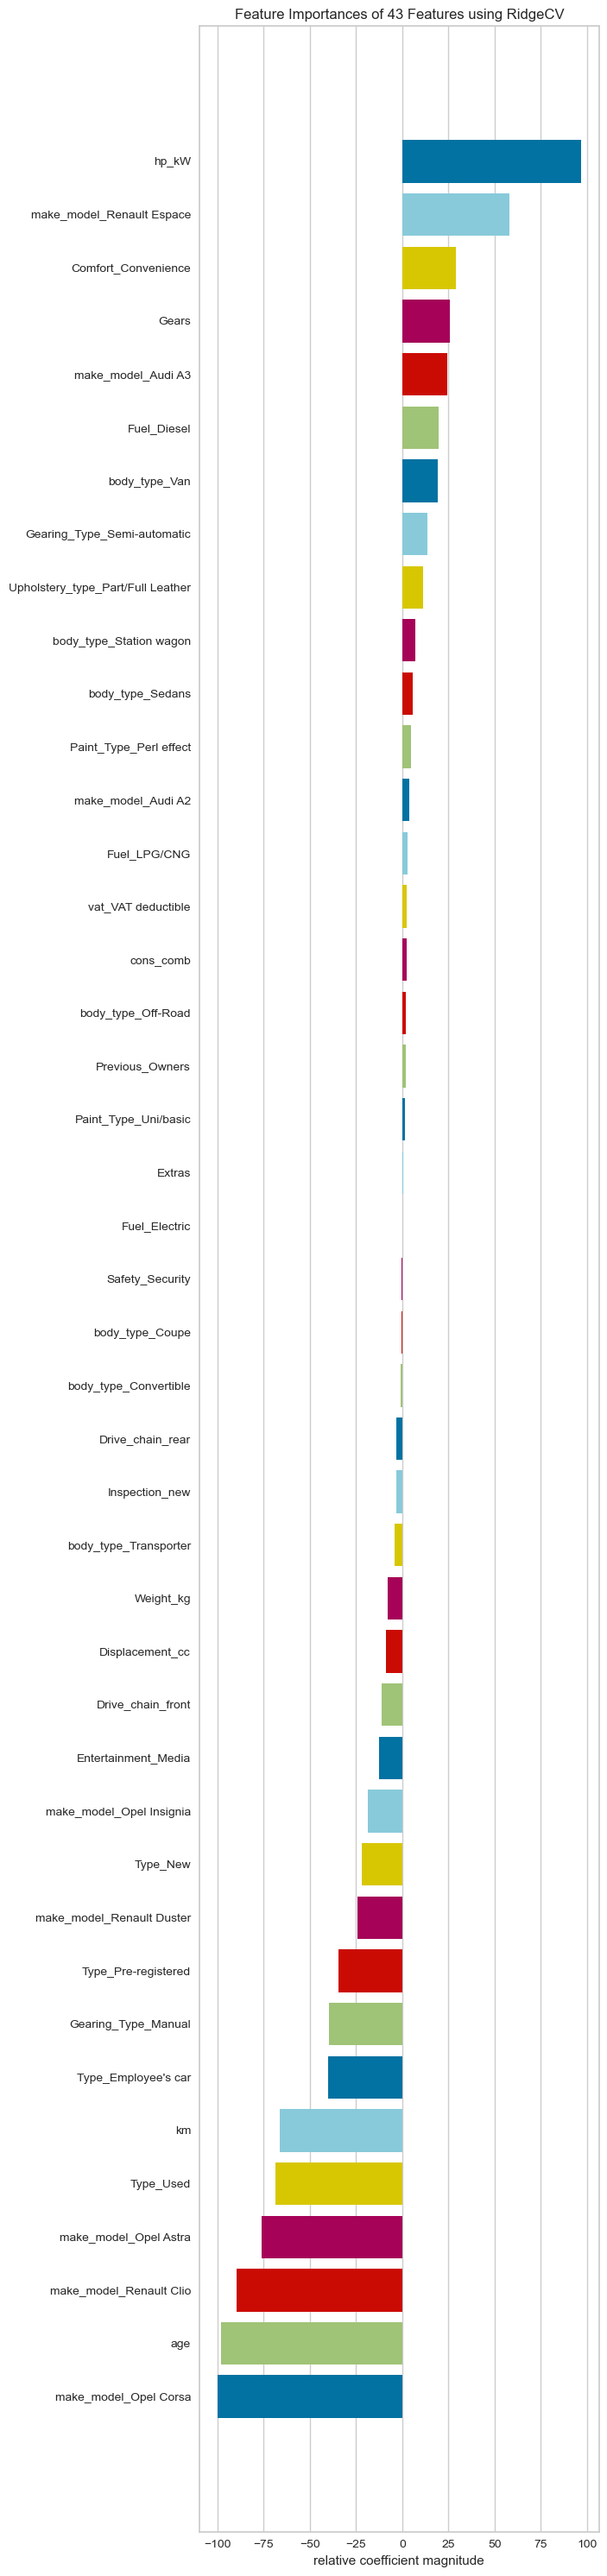

<Axes: title={'center': 'Feature Importances of 43 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [341]:
viz = FeatureImportances(ridge_cv_model, labels = pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720,3000))
viz.fit(X_train, y_train)
viz.show()

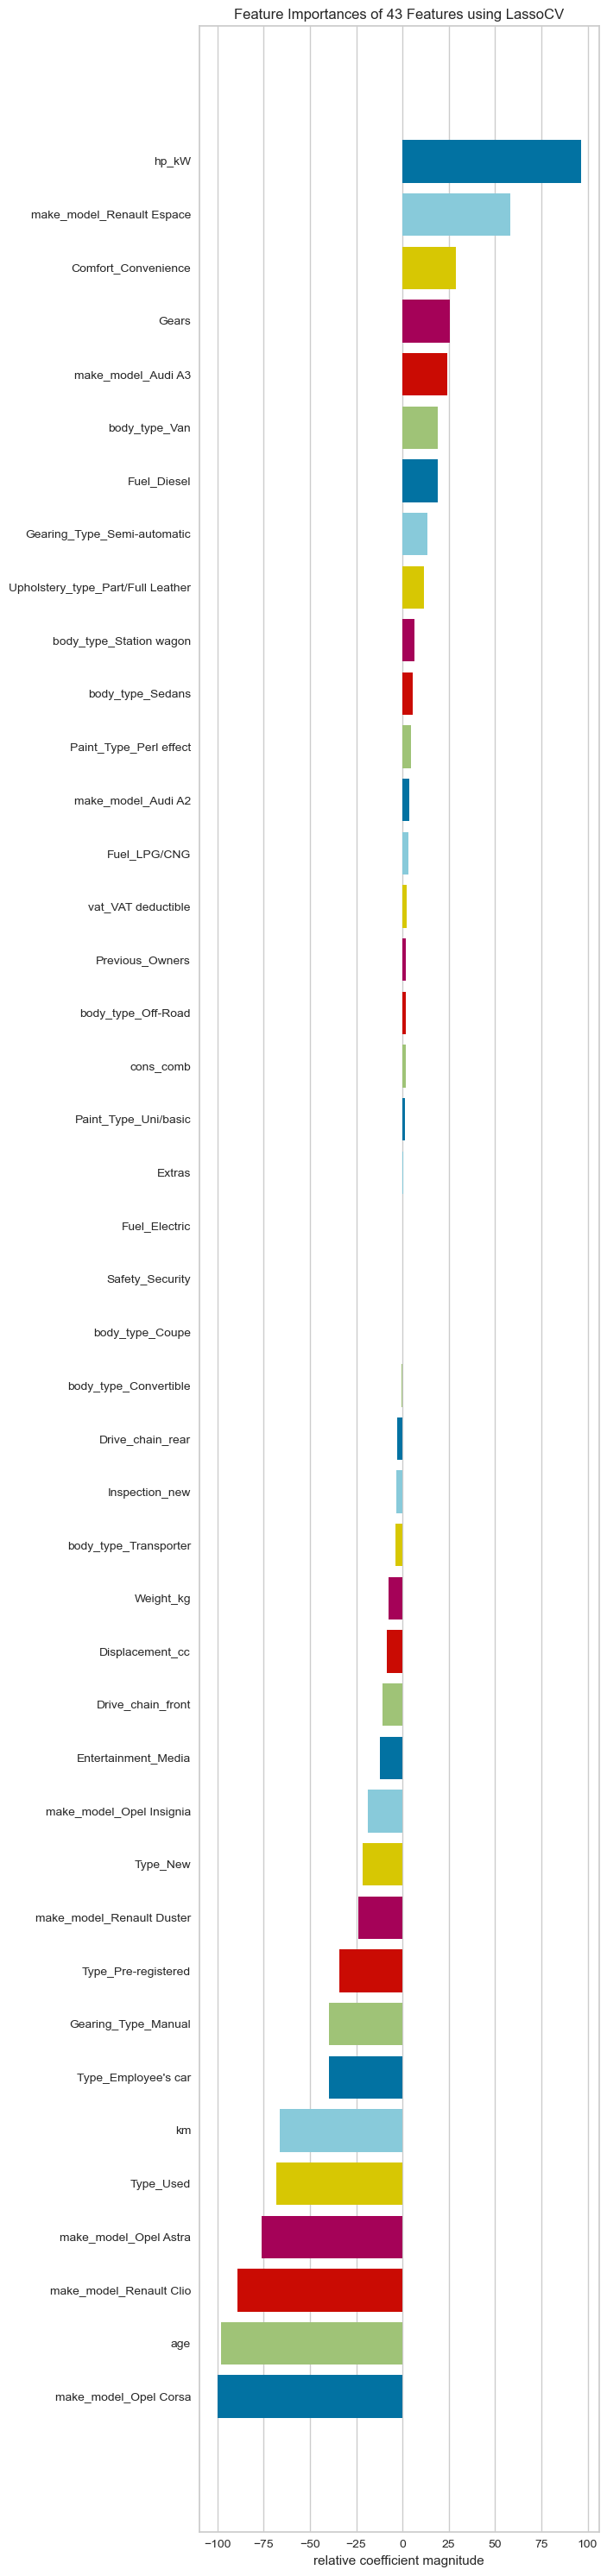

<Axes: title={'center': 'Feature Importances of 43 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [342]:
viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

## 7. Visually Compare Models Performance In a Graph

In [343]:
all_scores =  pd.concat([ls, rs, rcs, lss, lcs, es, ecs], axis=1)

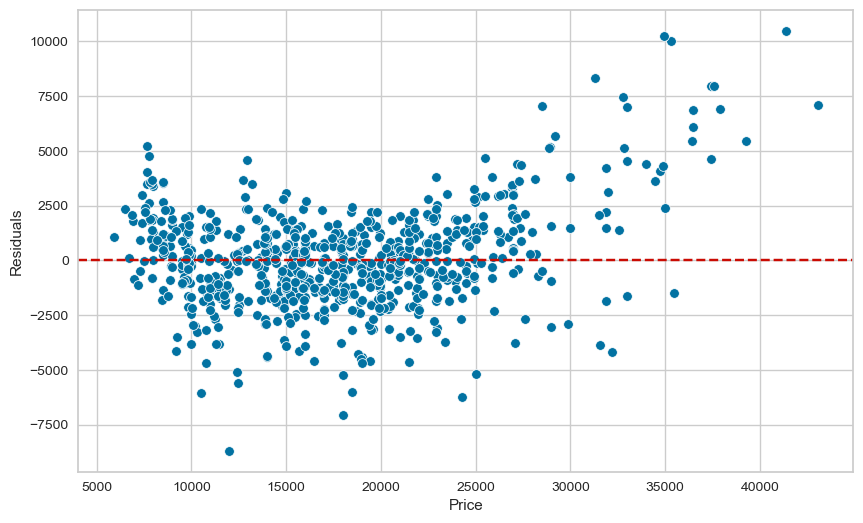

In [344]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))

sns.scatterplot(x= y_test, y=residuals)
plt.xlabel("Price")
plt.ylabel("Residuals")
plt.axhline(y=0, color = "r", linestyle ="--" )
plt.show()

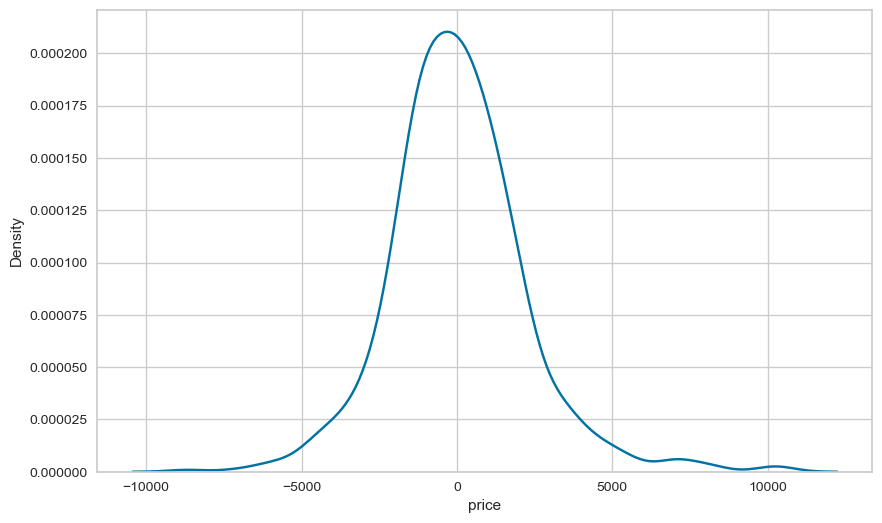

In [345]:
sns.kdeplot(residuals);

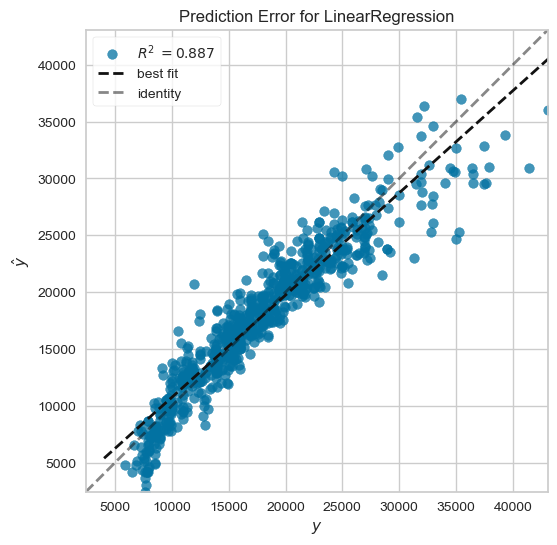

In [346]:
# hatalarımızın nasıl dağıldığına bakıyoruz
from yellowbrick.regressor import PredictionError

model = LinearRegression() # modelimizi reset ediyoruz
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # train datası ile eğitiyoruz  
visualizer.score(X_test, y_test)  # test datası ile skorlarını alıyoruz 
visualizer.show(); # grafikleri çizdiriyoruz

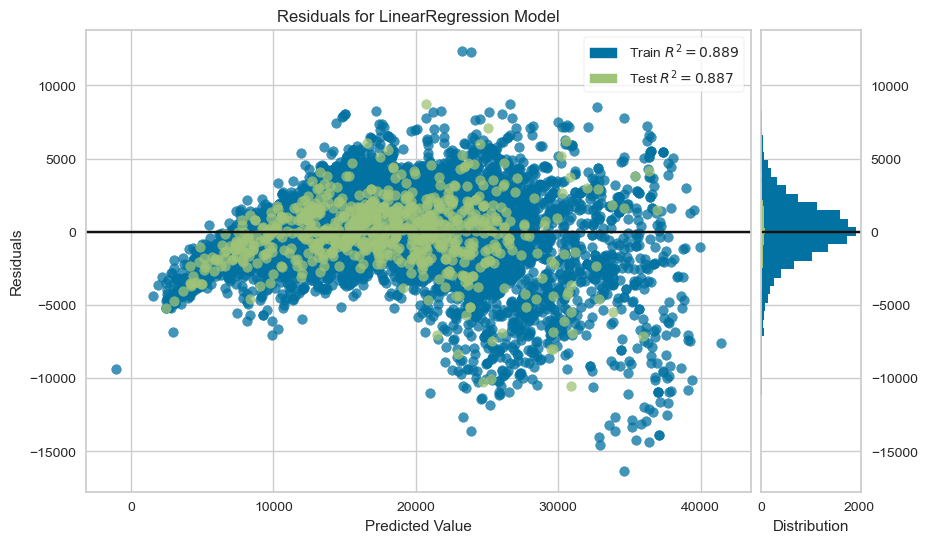

In [347]:
from yellowbrick.regressor import ResidualsPlot


model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show();  

In [348]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "mse": lm_mse,                    
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rs_R2, 
 "mae": rs_mae,
"mse": rs_mse, 
 "rmse": rs_rmse},
    
 "lasso_m": {"r2_score": lss_R2, 
 "mae": lss_mae, 
 "mse": lss_mse,           
 "rmse": lss_rmse},

 "elastic_m": {"r2_score": es_R2, 
 "mae": es_mae, 
 "mse": es_mse,             
 "rmse": es_rmse}}
scores = pd.DataFrame(scores).T
scores

# tüm modellerden elde ettiğimiz metricleri jason formatında scores değişkenine atıyoruz. Daha sonra model isimlerinin
# indexte, metriclerin featurlarda görünmesi maksadıyla df'in transposunu alıyoruz.

r2_score         mae            mse        rmse
linear_m   0.886827 1598.625647 4814146.320059 2194.116296
ridge_m    0.886833 1598.572759 4813895.434044 2194.059123
lasso_m    0.886834 1598.538819 4813880.235108 2194.055659
elastic_m  0.850912 1819.423688 6341926.745464 2518.318238

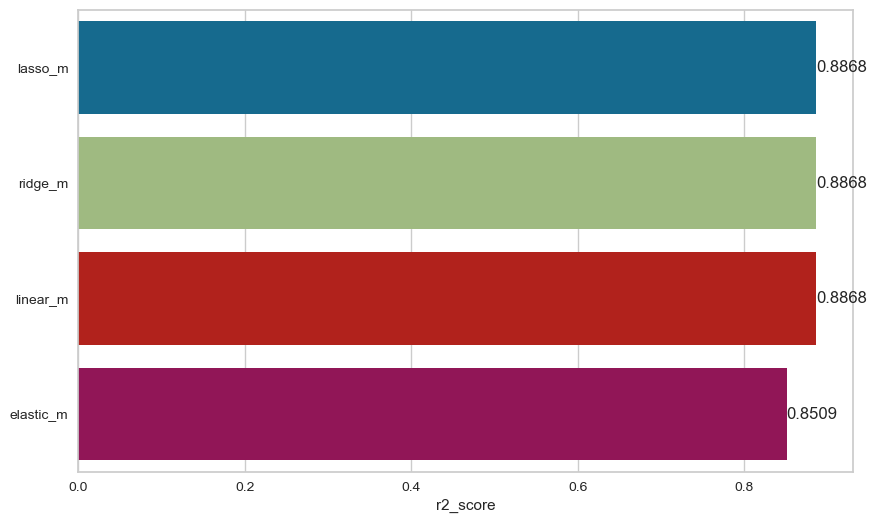

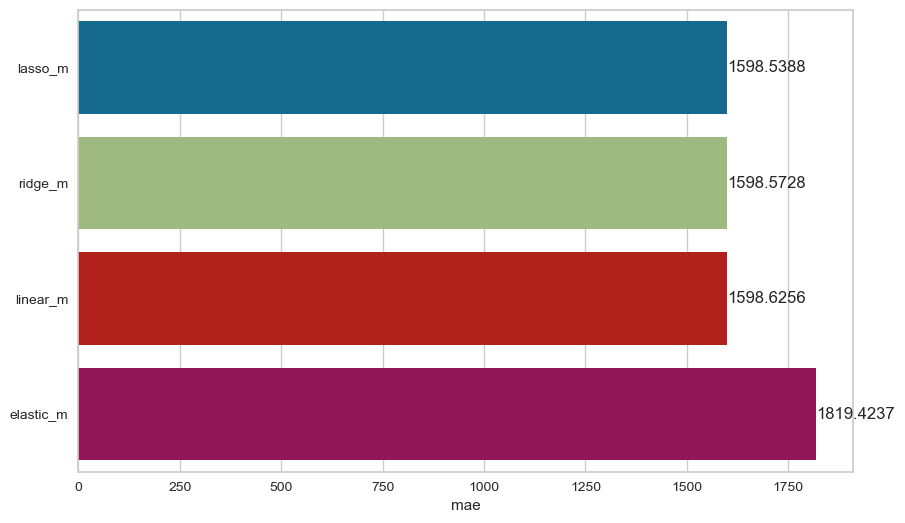

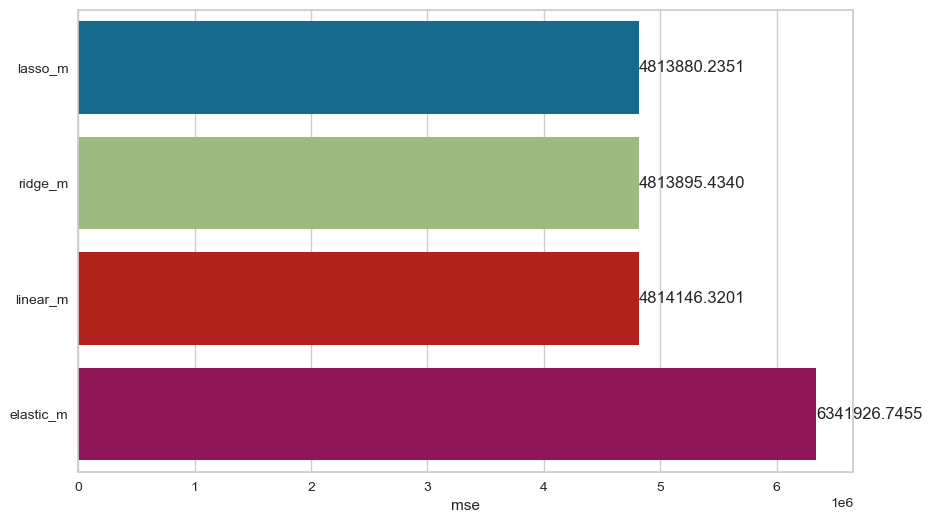

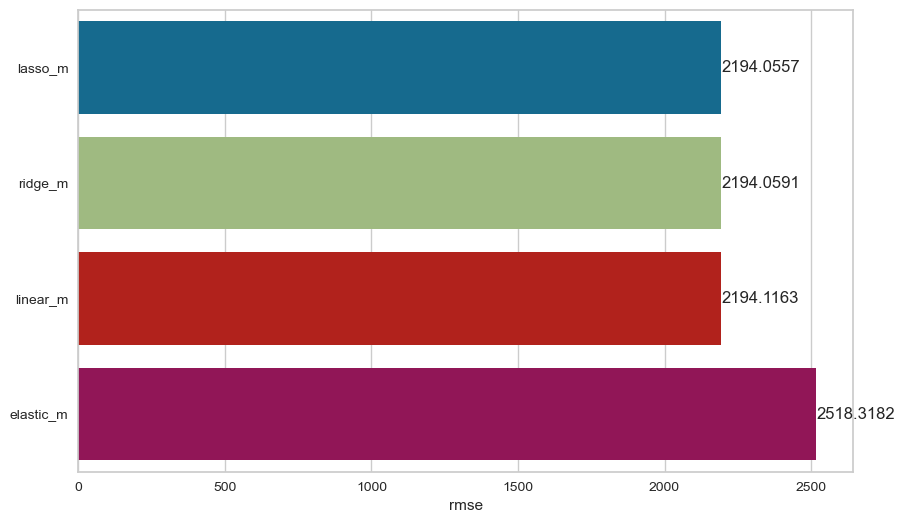

In [349]:
# metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False # eğer metricimiz r2_score ise barplot büyükten küçüğe sıralanacak
    else:
        ascending = True # eğer metricimiz mae veya rmse ise barplot küçükten büyüğe sıralanacak
    compare = scores.sort_values(by=j, ascending=ascending) # ilgili metrice göre compare df'i yeniden sıralandırılıyor
    ax = sns.barplot(x = compare[j] , y= compare.index) # compare df'den compare[j] ile ilgili metric scorları sıralı
                                                        # bir şekilde çekiliyor ve barplotta görselleştiriliyor.
                                                        # y=compare.index, görselimizin y ekseninde model isimleri yazacak.
    ax.bar_label(ax.containers[0], fmt="%.4f"); # annotate "."dan 4 rakam gelecek şekilde düzenleniyor.

In [350]:
df.head(3)

make_model body_type  price               vat           km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000000  Used   Diesel   

     Gears                                Comfort_Convenience  \
0 7.000000  Air conditioning,Armrest,Automatic climate con...   
1 7.000000  Air conditioning,Automatic climate control,Hil...   
2 7.000000  Air conditioning,Cruise control,Electrical sid...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   

                                     Safety_Security      age  \
0  ABS,Central door lock,Daytime running lights,D... 3.000000   
1  ABS,Central door lock,Central door lock with r... 2.000000   
2  ABS,Central door lock,Daytime running lights,D... 3.000000   

   Previous_Owners      hp_kW  Inspection_new Paint_Type Upholstery_type  \
0         2.000000  66.000000               1   Metallic           Cloth   
1         1.000000 141.000000               0   Metallic           Cloth   
2         1.000000  85.000000               0   Metallic           Cloth   

  Gearing_Type  Displacement_cc   Weight_kg Drive_chain  cons_comb  
0    Automatic      1422.000000 1220.000000       front   3.800000  
1    Automatic      1798.000000 1255.000000       front   5.600000  
2    Automatic      1598.000000 1135.000000       front   3.800000

In [351]:
df.shape

(15915, 23)

In [352]:
selected_columns = ["make_model", "price", "km", "Type", "Fuel", "Gears", "age", "hp_kW", "Gearing_Type"]

In [353]:
df = df[selected_columns].copy()
df

make_model  price           km            Type     Fuel    Gears  \
0             Audi A1  15770 56013.000000            Used   Diesel 7.000000   
1             Audi A1  14500 80000.000000            Used  Benzine 7.000000   
2             Audi A1  14640 83450.000000            Used   Diesel 7.000000   
3             Audi A1  14500 73000.000000            Used   Diesel 6.000000   
4             Audi A1  16790 16200.000000            Used   Diesel 7.000000   
...               ...    ...          ...             ...      ...      ...   
15910  Renault Espace  39950  1647.362609             New   Diesel 6.000000   
15911  Renault Espace  39885  9900.000000            Used  Benzine 7.000000   
15912  Renault Espace  39875    15.000000  Pre-registered   Diesel 6.000000   
15913  Renault Espace  39700    10.000000  Pre-registered   Diesel 6.000000   
15914  Renault Espace  40999  1647.362609   Demonstration  Benzine 6.000000   

           age      hp_kW Gearing_Type  
0     3.000000  66.000000    Automatic  
1     2.000000 141.000000    Automatic  
2     3.000000  85.000000    Automatic  
3     3.000000  66.000000    Automatic  
4     3.000000  66.000000    Automatic  
...        ...        ...          ...  
15910 0.000000 147.000000    Automatic  
15911 0.000000 165.000000    Automatic  
15912 0.000000 146.000000    Automatic  
15913 0.000000 147.000000    Automatic  
15914 0.000000 165.000000    Automatic  

[15915 rows x 9 columns]

In [355]:
check = df.tail(5)
check

make_model  price          km            Type     Fuel    Gears  \
15910  Renault Espace  39950 1647.362609             New   Diesel 6.000000   
15911  Renault Espace  39885 9900.000000            Used  Benzine 7.000000   
15912  Renault Espace  39875   15.000000  Pre-registered   Diesel 6.000000   
15913  Renault Espace  39700   10.000000  Pre-registered   Diesel 6.000000   
15914  Renault Espace  40999 1647.362609   Demonstration  Benzine 6.000000   

           age      hp_kW Gearing_Type  
15910 0.000000 147.000000    Automatic  
15911 0.000000 165.000000    Automatic  
15912 0.000000 146.000000    Automatic  
15913 0.000000 147.000000    Automatic  
15914 0.000000 165.000000    Automatic

In [356]:
df.shape

(15915, 9)

In [357]:
df = df[:-5]

In [367]:
df.shape

(15910, 9)

## Final Model

In [373]:
X = df.drop('price', axis=1)
y =df["price"]

In [374]:
from sklearn.pipeline import Pipeline

In [375]:
operations = [("OneHotEncoder", encoder ), 
              ("scaler", StandardScaler()), ("Lasso", Lasso(alpha=1.0))]
final_model = Pipeline(steps=operations)

In [376]:
final_model.fit(X,y)

Pipeline(steps=[('OneHotEncoder',
                 OneHotEncoder(drop='first', sparse=False,
                               sparse_output=False)),
                ('scaler', StandardScaler()), ('Lasso', Lasso())])

## Prediction new observation

## random state=42

In [377]:
X = check.drop(columns = ["price"])
y = check.price


In [378]:
X.head(3)

make_model          km            Type     Fuel    Gears      age  \
15910  Renault Espace 1647.362609             New   Diesel 6.000000 0.000000   
15911  Renault Espace 9900.000000            Used  Benzine 7.000000 0.000000   
15912  Renault Espace   15.000000  Pre-registered   Diesel 6.000000 0.000000   

           hp_kW Gearing_Type  
15910 147.000000    Automatic  
15911 165.000000    Automatic  
15912 146.000000    Automatic

In [382]:
predictions = final_model.predict(X)

In [388]:
results = pd.DataFrame()
results["actual price"] = y
results["predictions"] = predictions
results["residuals"] = results["actual price"] - results["predictions"]
results

actual price  predictions    residuals
15910         39950 41618.724419 -1668.724419
15911         39885 38674.152686  1210.847314
15912         39875 39051.907449   823.092551
15913         39700 40645.481019  -945.481019
15914         40999 40046.094517   952.905483

# !! (Dont forget Grid-Search)!!





# Congratulations

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Modelling_Auto_Scout_Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |